In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [6]:
df = pd.read_csv('Leads.csv')

In [7]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
percentage_missing = df.isnull().sum()*100/len(df)
percentage_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
df.shape

(9240, 37)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data cleaning

##### removing the null values

In [13]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [14]:
drop_df = list(df.columns[100.0*df.isnull().mean()>40])
drop_df

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [15]:
df = df.drop(drop_df,axis =1)

In [16]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [17]:
#higlighting of the columns which has null values
df.isna().sum().sort_values(ascending =False).pipe(lambda x:x[x>0])

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
dtype: int64

In [18]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [19]:
#finding the null percentage 

null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### 1. Column: Country

- Country has 26.6 percentage missing values

<AxesSubplot:>

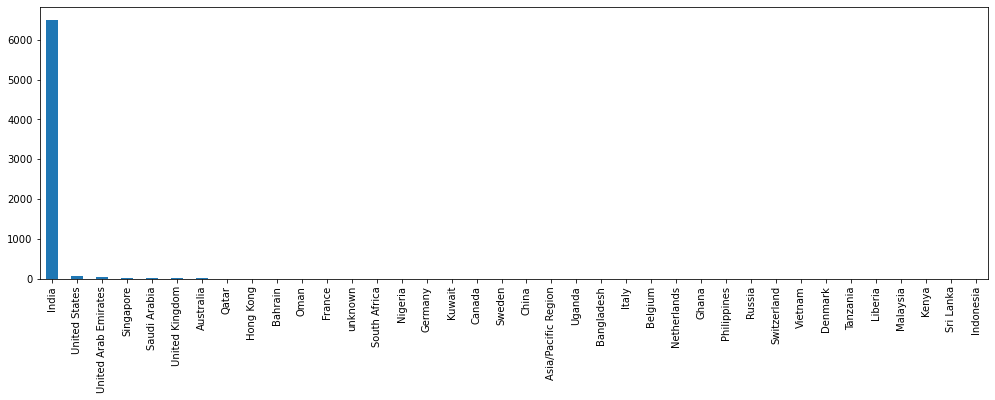

In [20]:
plt.figure(figsize=(17,5))
df.Country.value_counts().plot.bar()

we see most values in India and it is highely skewed. we have to impute missing values in this column value.

In [21]:
df['Country']=df['Country'].replace(np.nan,'India')

<AxesSubplot:>

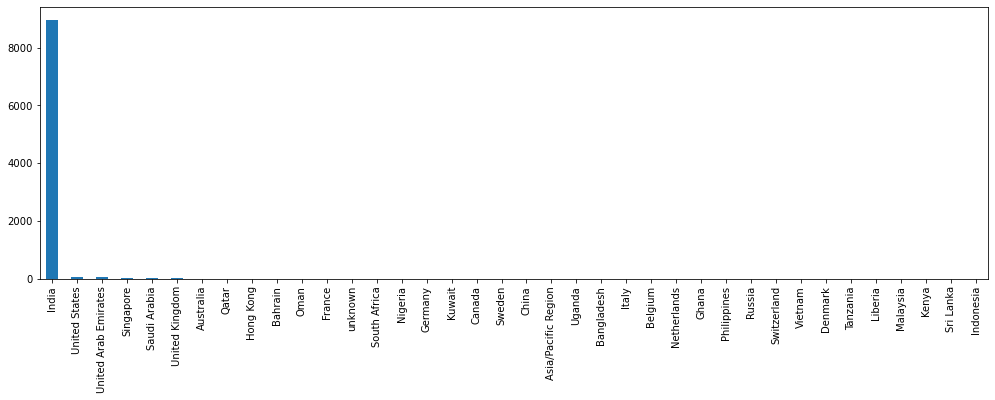

In [22]:
plt.figure(figsize=(17,5))
df.Country.value_counts().plot.bar()

### 2. Column : Specialization

- Specialization has 36.58% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

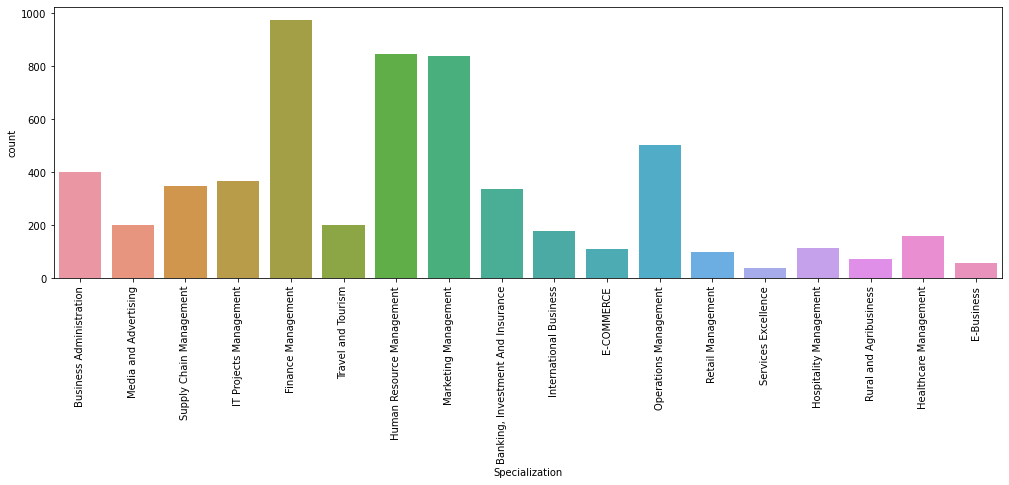

In [18]:
plt.figure(figsize=(17,5))
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)

- There is 36.58% missing values present in the Specialization column .It may be possible that the lead maybe leave this column blank because if he may be a student or not having any specialization given. So we can create a another category 'Others' for this.

In [19]:
df['Specialization'] =df['Specialization'].replace(np.nan, 'Others')

<AxesSubplot:>

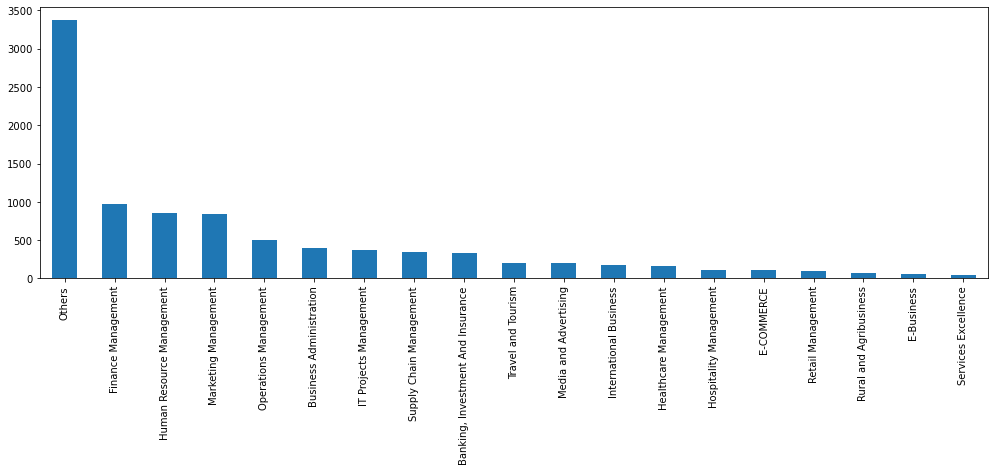

In [20]:
plt.figure(figsize=(17,5))
df.Specialization.value_counts().plot.bar()

### 3 Column : What is your current occupation 

-  we see that 29.112554 has missing values in  occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

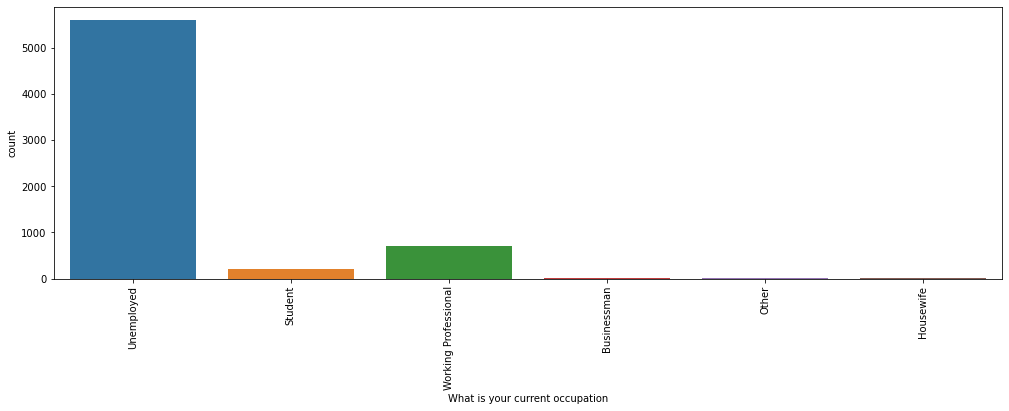

In [21]:
plt.figure(figsize=(17,5))
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)

In [22]:
round(df['What is your current occupation'].value_counts(normalize = True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

- since most value are unemployeed, we can impute missing values in this columns

In [23]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

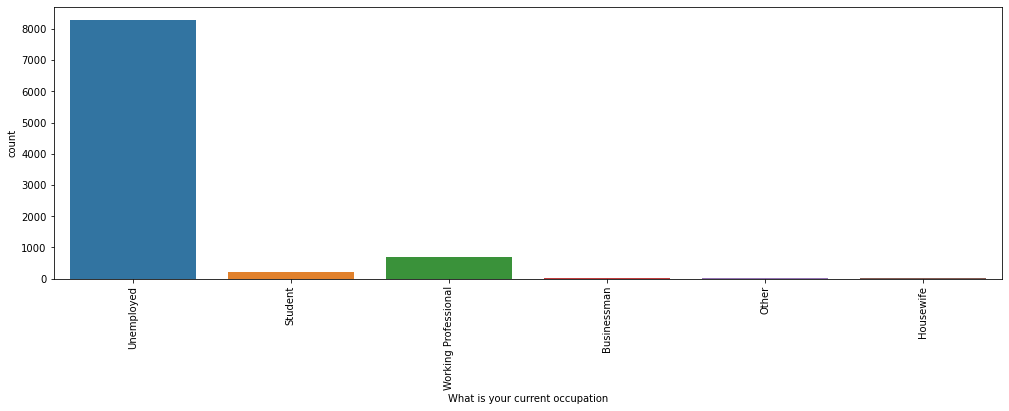

In [24]:
plt.figure(figsize=(17,5))
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)

### 4. Columns: What matters most to you in choosing a course

- we see that 29.318182 is missing on choosing course

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

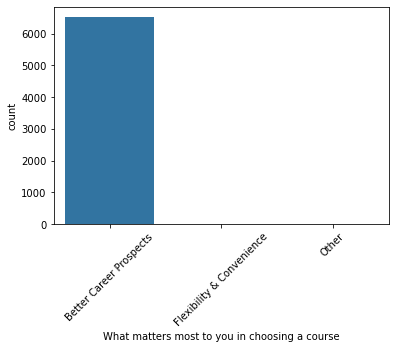

In [25]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation= 45)

In [26]:
round(df['What matters most to you in choosing a course'].value_counts(normalize= True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

we see 'Better carrer prosepects' is highly skewed. so we are removing this column

In [27]:
# Dropping this column

df = df.drop('What matters most to you in choosing a course',axis =1)

### 5. Column: Tags 

- we see there are 36.287879 has missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

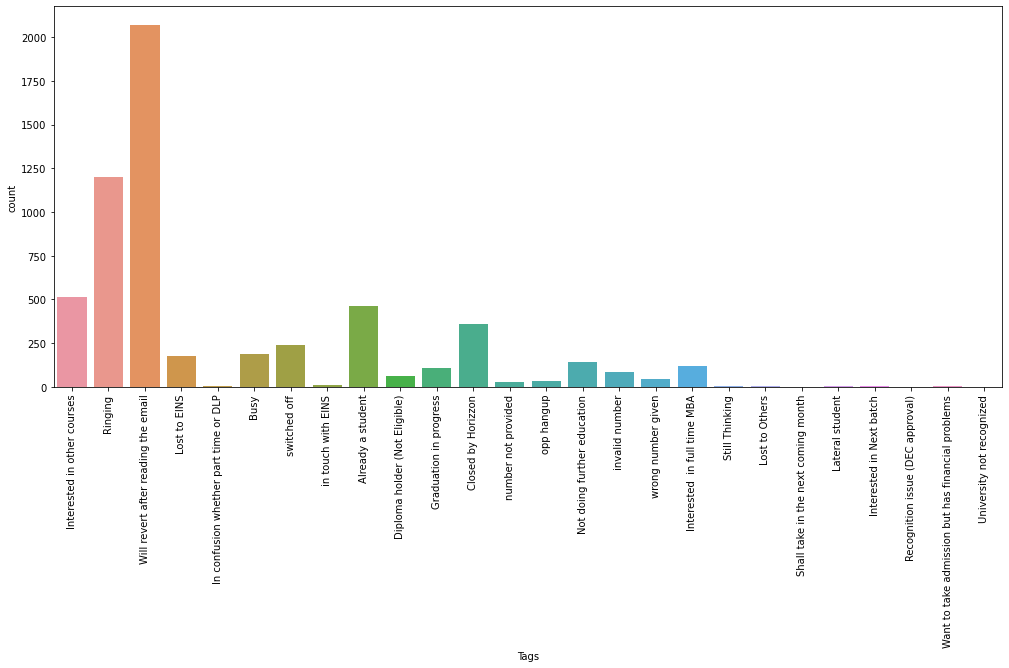

In [28]:
plt.figure(figsize=(17,7))
sns.countplot(df['Tags'])
plt.xticks(rotation=90)

as we see that 'will revert after reading this email'. we can impute missing value in this column with this value


In [29]:
# replacing missing data with 'Will revert after reading thie email.'

df['Tags'] = df['Tags'].replace(np.nan,'Will revert after reading the email')

<AxesSubplot:>

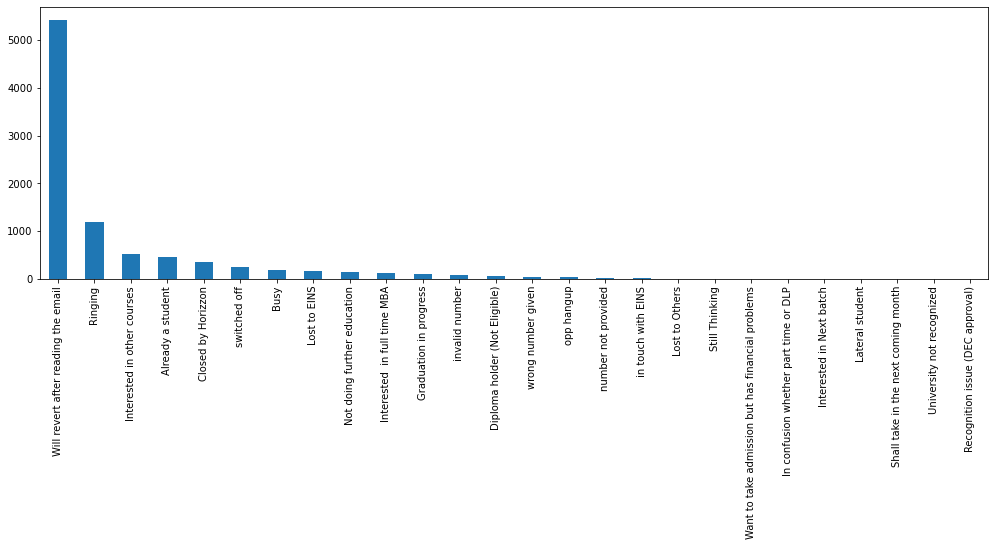

In [30]:
plt.figure(figsize=(17,5))
df.Tags.value_counts().plot.bar()

### 5.Columns - City

- this columns has 40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

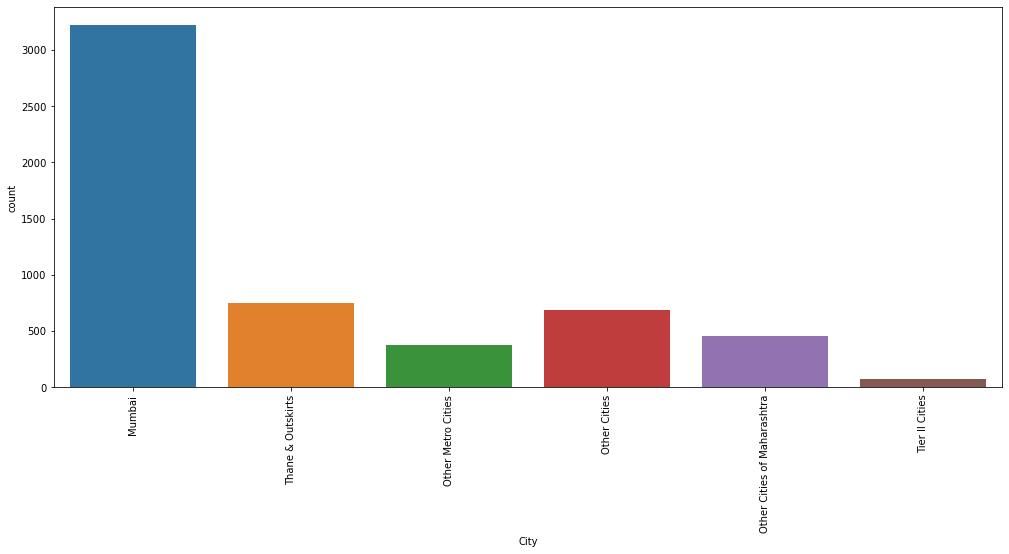

In [31]:
plt.figure(figsize=(17,7))
sns.countplot(df['City'])
plt.xticks(rotation=90)

In [32]:
round(df['City'].value_counts(normalize = True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

- since mumbai has the most value, we can impute missing values in this column 

In [33]:
df['City'] =df['City'].replace(np.nan, 'Mumbai')

<AxesSubplot:>

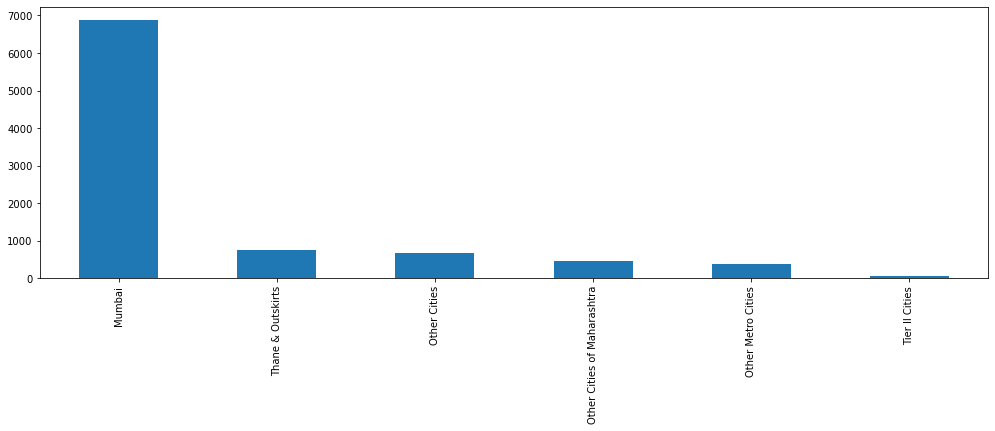

In [34]:
plt.figure(figsize=(17,5))
df.City.value_counts().plot.bar()

In [35]:
#total null percentage across columns after removing the above columns

null_percentage1 = df.isnull().sum()*100/len(df)
null_percentage1

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

##### handling another missing values which are under 2%

In [36]:
#dropping the rows of null values

df.dropna(inplace=  True)

In [37]:
null_percentage2 = df.isnull().sum()*100/len(df)
null_percentage2

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

- all missing values is treated

In [38]:
#percentage of rows retained

(len(df.index)/9240)*100

98.2034632034632

###### we have reatined 98% of the rows after cleaning the data

# Exploratory Data Anaysis [EDA]

In [39]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see no duplicate data 

## Univariate Analysis and Bivariate Analysis 

### Converted

###### Converted is a target variable, we are applying this to check wheather a lead has been sucessfully converted(1) or not(0).

In [40]:
Converted =(sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

The lead Conversasion rate is 38%

### Lead origin

Text(0.5, 1.0, 'Lead Origin')

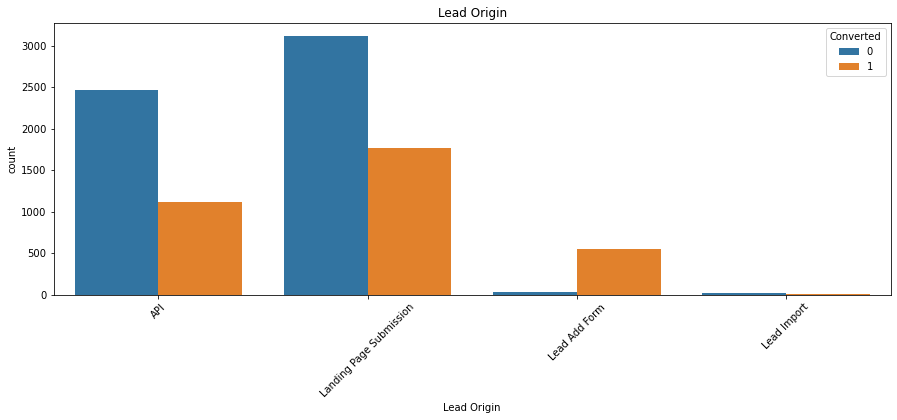

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df).tick_params(axis ='x', rotation=45)
plt.title('Lead Origin')

#####  Conclusion:
1. API  and landing page submission has 30-35% conversion rate but count of lead originated from them are considerable
2. Lead add form has more than 90% conversion rate but count of lead are not high
3. lead import has very less in count.

###### To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and landing Pade Submission origin and generate more leads from LeadAddForm

### Lead Source

Text(0.5, 1.0, 'Lead Source')

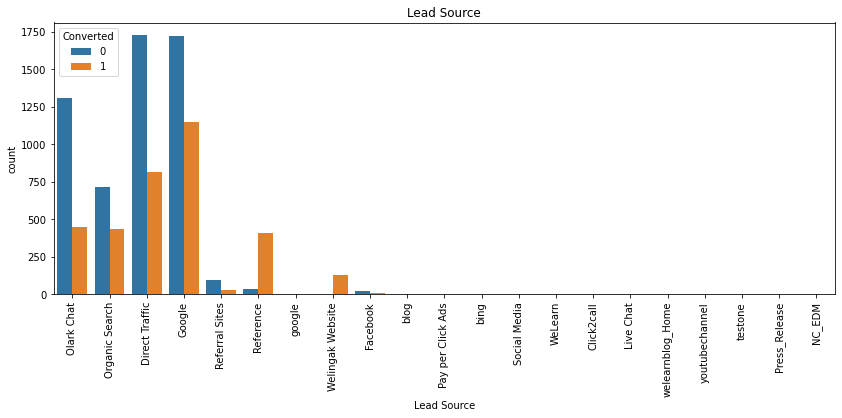

In [42]:
plt.figure(figsize=(14, 5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df).tick_params(axis ='x', rotation=90)
plt.title('Lead Source')

We see there Google is mentioned 2 times in the data so we are replacing the google with Google

In [43]:
df['Lead Source'] = df['Lead Source'].replace(['google'],'Google')

In [44]:
# now we are updating new caategory as Others which do not have much values

df['Lead Source'] = df['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call',
                                              'Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release',
                                              'NC_EDM'],'Others')

Text(0.5, 1.0, 'Lead Source')

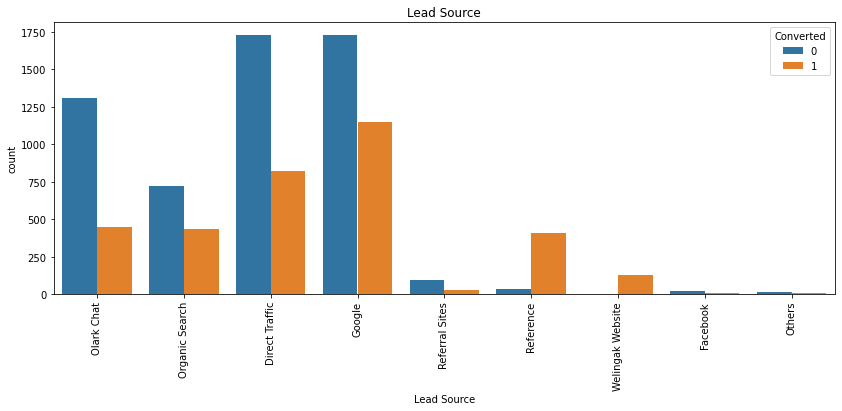

In [45]:
plt.figure(figsize=(14, 5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df).tick_params(axis ='x', rotation=90)
plt.title('Lead Source')

###### Conclusion:

1. Google and Direct Traffic generates maximum number of leads
2. Conversion rate of reference and Welingak website is high


#### to Improve overall lead conversion rate, we should focus on  improving lead conversion of Olark chat, Organic Search, Direct Traffic, Google  and we need to generate more leads from reference and Wlingak website

### Do Not email and Do not call

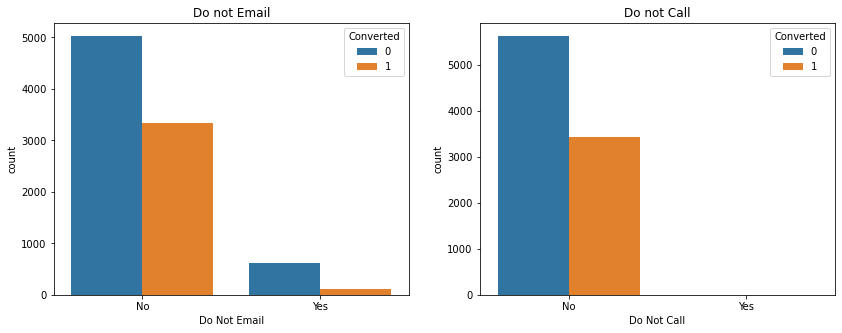

In [46]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = df)
plt.title('Do not Email')

plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = df)
plt.title('Do not Call')
plt.show()

#####  Conclusion:

Most for both the enteries are 'NO'. No inference can be drawn  with this parameter

### Total Visits

In [47]:
df['TotalVisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

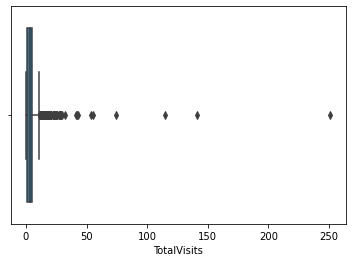

In [48]:
sns.boxplot(df['TotalVisits'], orient='v')

###### we see that there are a number of outliers. we cap the outliers to 95% value for analysis

In [49]:
precentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= precentiles[0]] = precentiles[0]
df['TotalVisits'][df['TotalVisits'] >= precentiles[1]] = precentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

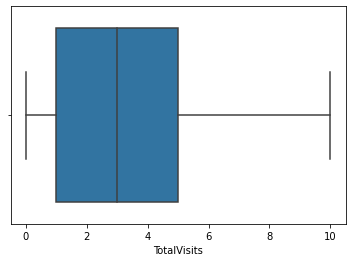

In [50]:
sns.boxplot(df['TotalVisits'], orient='v')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

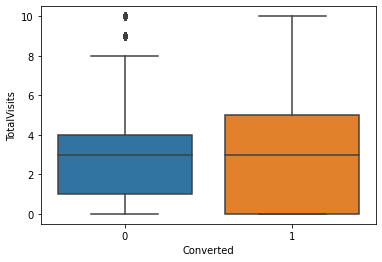

In [51]:
sns.boxplot(y ='TotalVisits', x = 'Converted', data = df)

##### Conclusion:

Median for converted and not converted leads are the same

Nothing can be Concluded on the basis of Total Visits

#### Total Time Spent on Website

In [52]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

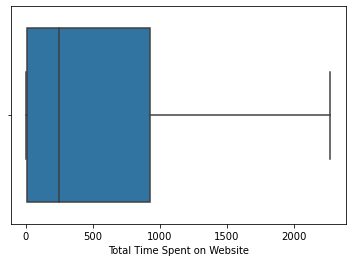

In [53]:
sns.boxplot(df['Total Time Spent on Website'], orient='v')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

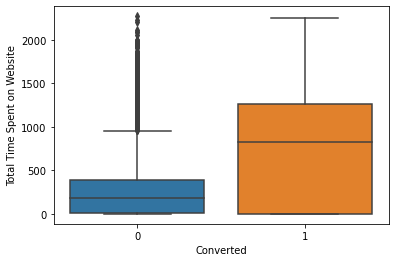

In [54]:
sns.boxplot(y='Total Time Spent on Website', x= 'Converted', data= df)

### Conclusion

- Leads spending more time on the websites are more likely to be converted

### Page Views Per Visit 

In [55]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

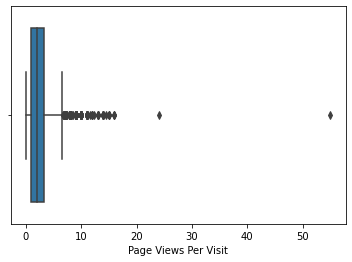

In [56]:
sns.boxplot(df['Page Views Per Visit'], orient= 'vert')

###### we see that there are a number of outliers. we cap the outliers to 95% value for analysis

In [57]:
precentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= precentiles[0]] = precentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= precentiles[1]] = precentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

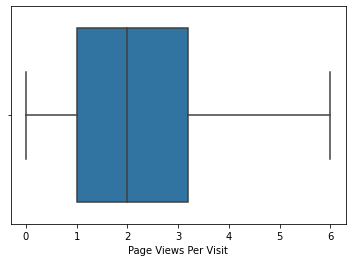

In [58]:
sns.boxplot(df['Page Views Per Visit'],orient= 'v')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

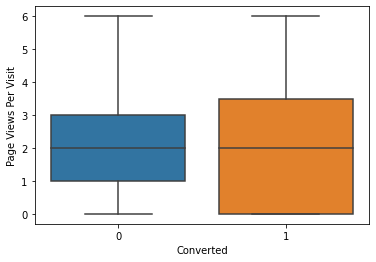

In [59]:
sns.boxplot(y ='Page Views Per Visit', x= 'Converted', data= df)

####  Conclusion:

1. median for converted and unconverted leads is the same


#### Nothing  can be said specifically for lead conversion from the Page Views per Visist

### Last Activity 

In [60]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

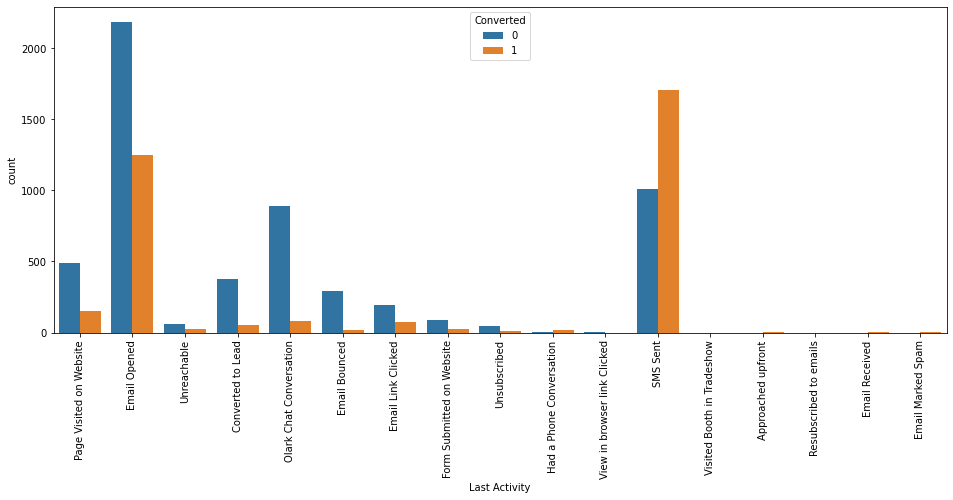

In [61]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

In [62]:
# we see there are many data which has less data so we are merging them as others

df['Last Activity']= df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
                                                 'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'], 'Others Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Others Activity'),
  Text(10, 0, 'SMS Sent')])

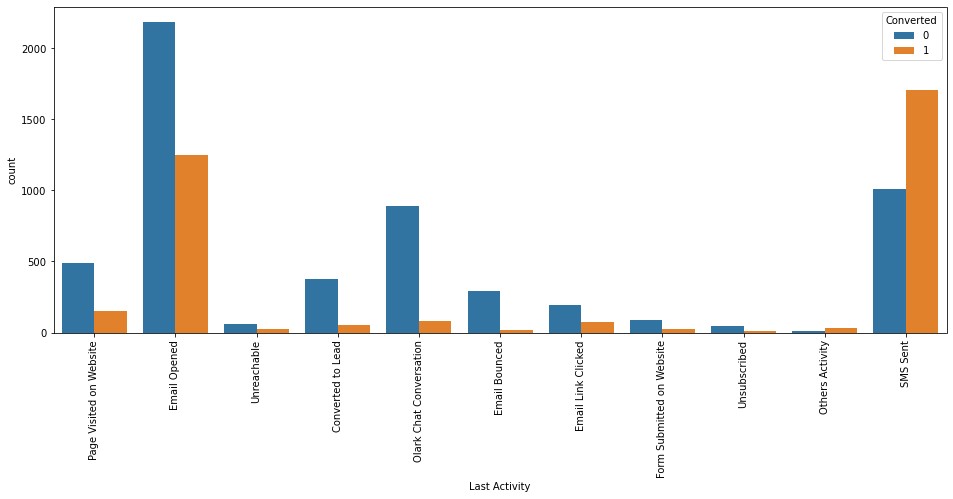

In [63]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

##### Conclusion:

1. Most of the lead have their Email Opened as thier last activity
2. Consversion rate for leads with last activity as SAMS sent is almost 60%.

### Country:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

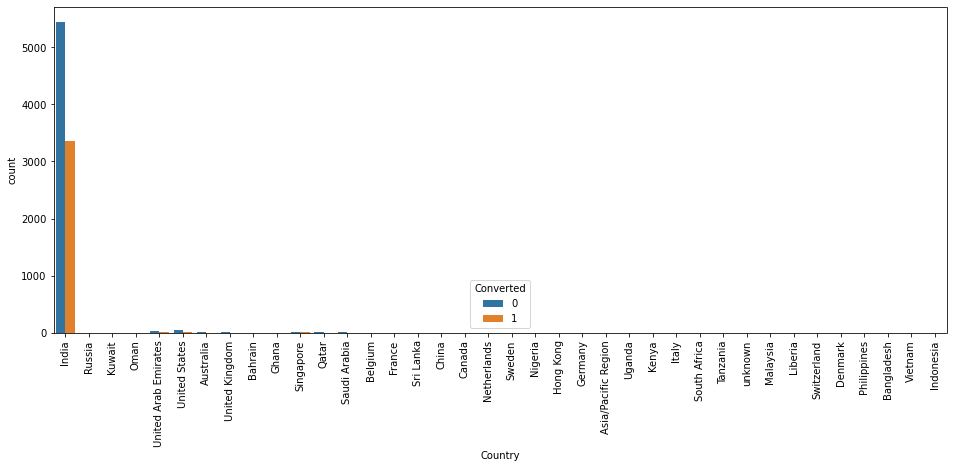

In [64]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Country', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

##### Most Value showing in India

### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

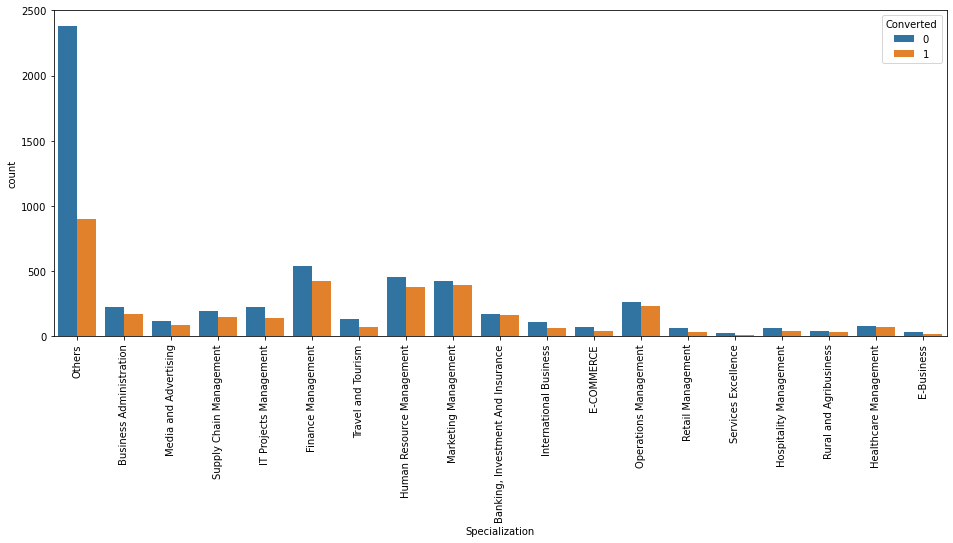

In [65]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

# Conslsuion:

Focus should be more on the Specialization with high conversion rate

#### What is your current occupation 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

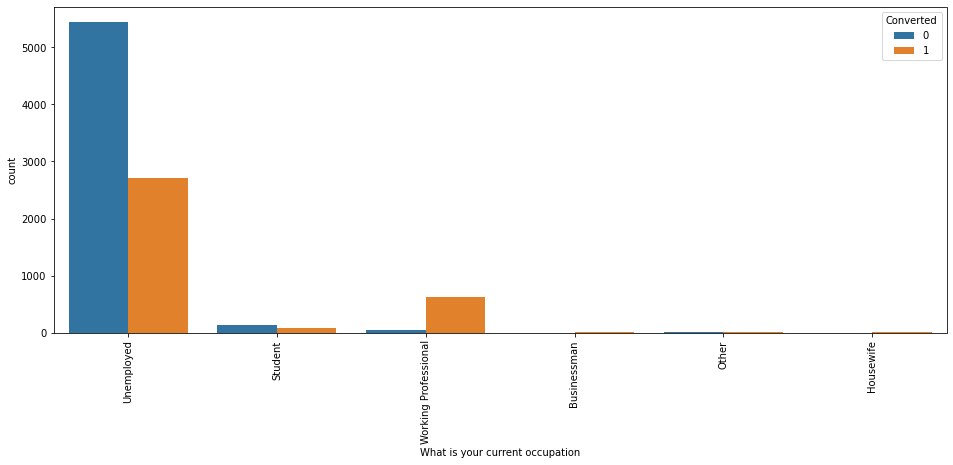

In [66]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

### Conclusion
- Unemployeed percentage is more  in numbers.
- working professionals has a high chances of joining it 

### Search 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

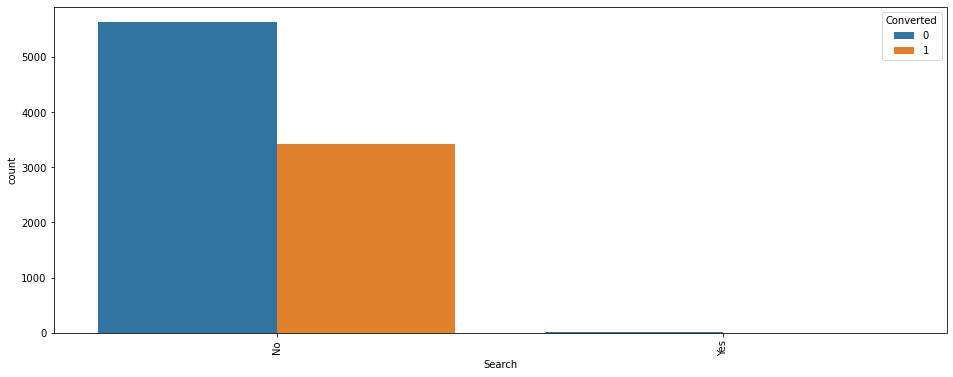

In [67]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Search', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

- Most entries are No. No conclusion can be drawn with this parameter

## Magazine 

(array([0]), [Text(0, 0, 'No')])

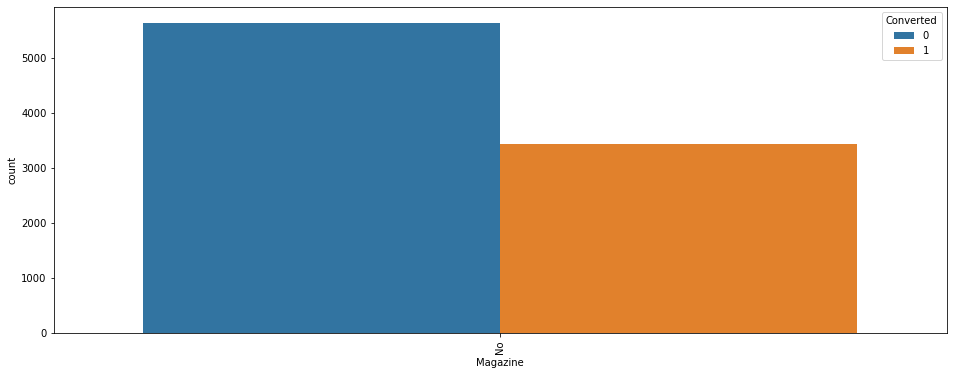

In [68]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Magazine', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Newspaper Article 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

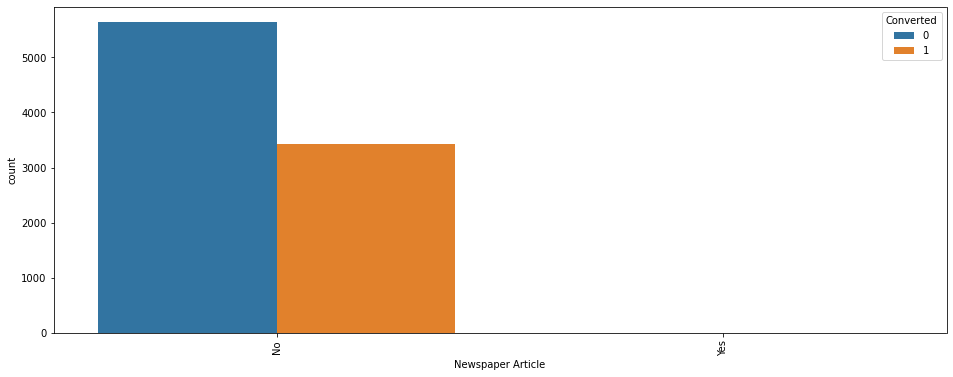

In [69]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

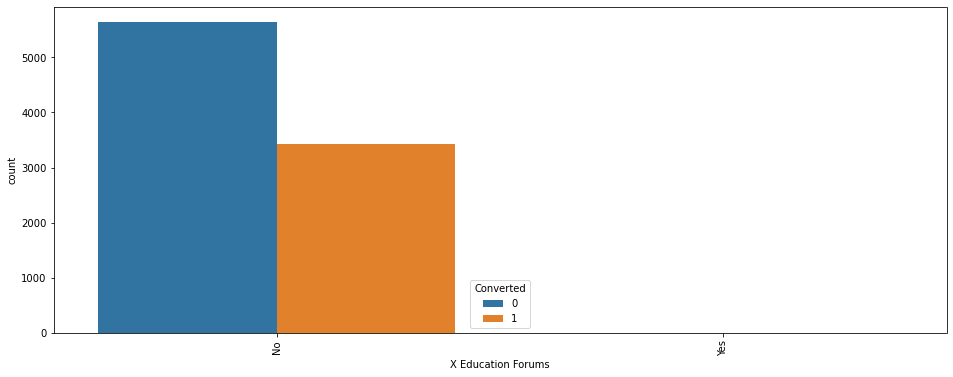

In [70]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Newspaper 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

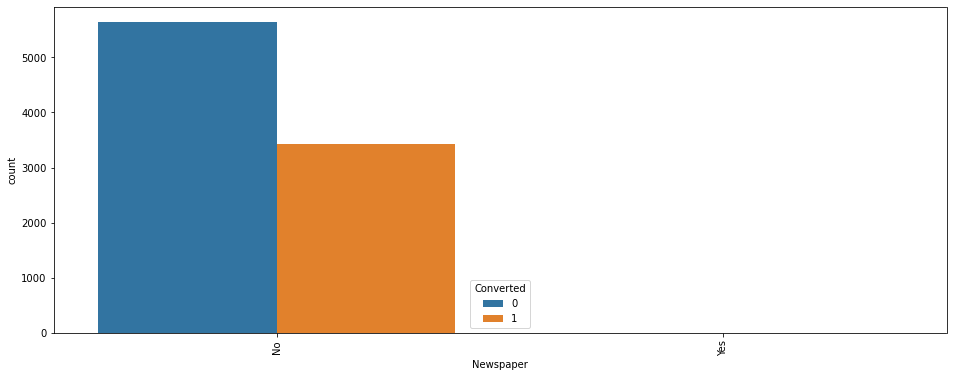

In [71]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Newspaper', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Digital Advertisement


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

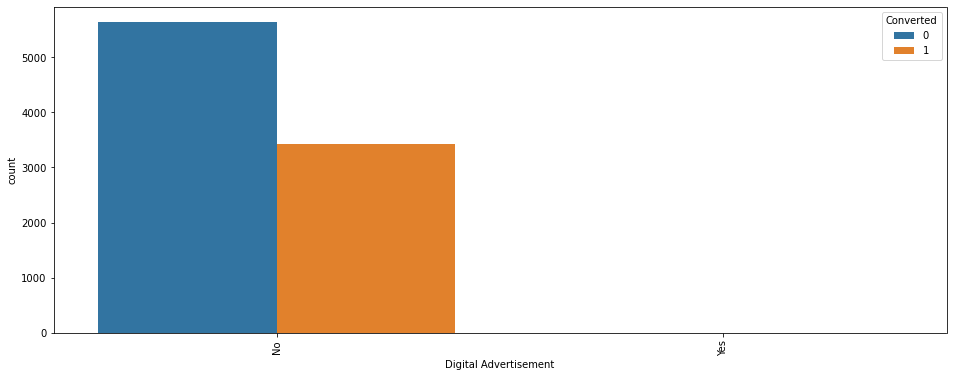

In [72]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

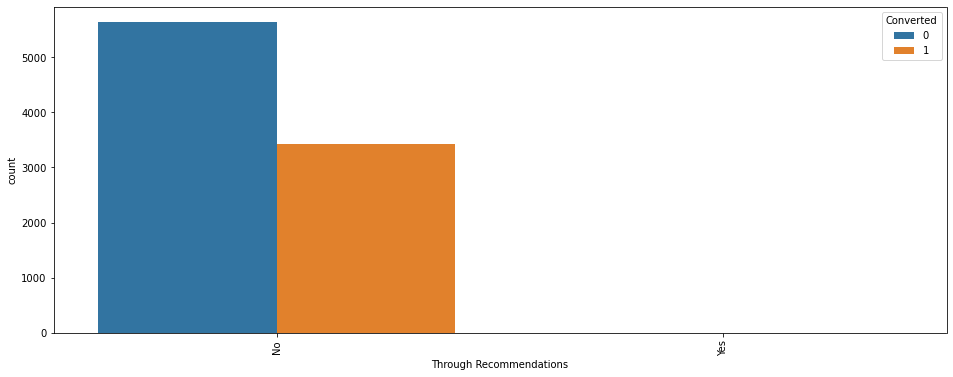

In [73]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Receive More Updates About Our Courses 

(array([0]), [Text(0, 0, 'No')])

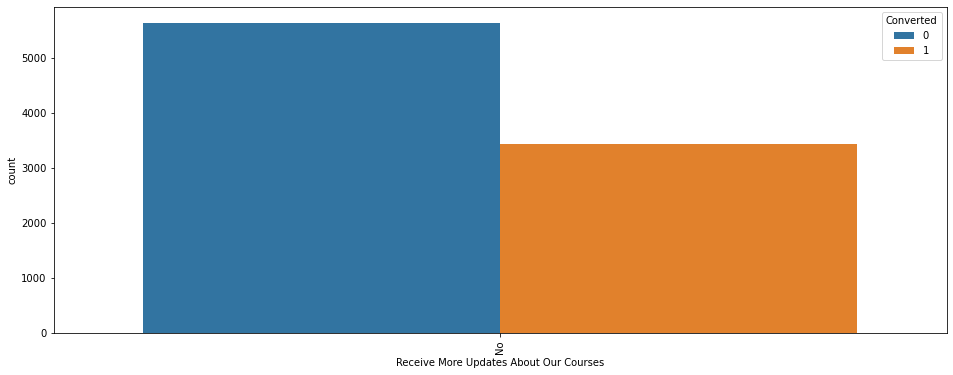

In [74]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Receive More Updates About Our Courses', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

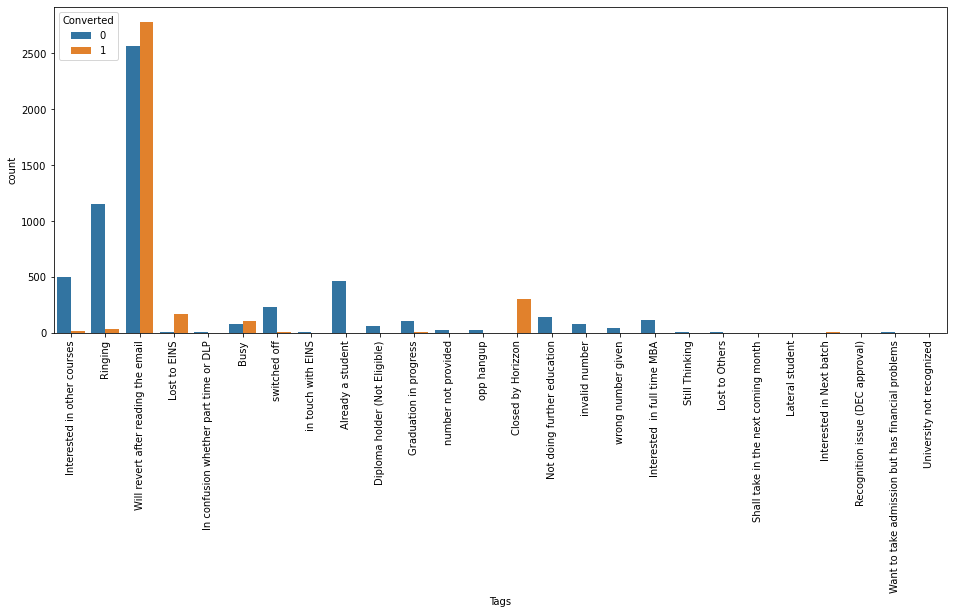

In [75]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Tags', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

###  Conclusion: 

- we see that 'We revert after reading the email' has the highjer conversion rate

### Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

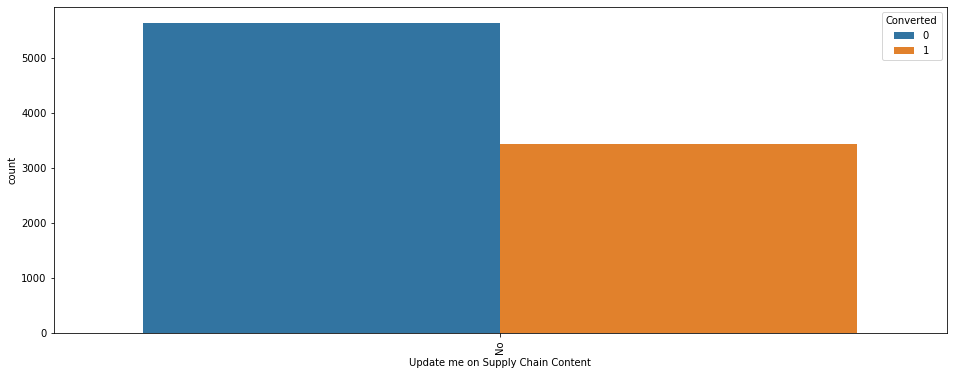

In [76]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Update me on Supply Chain Content', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

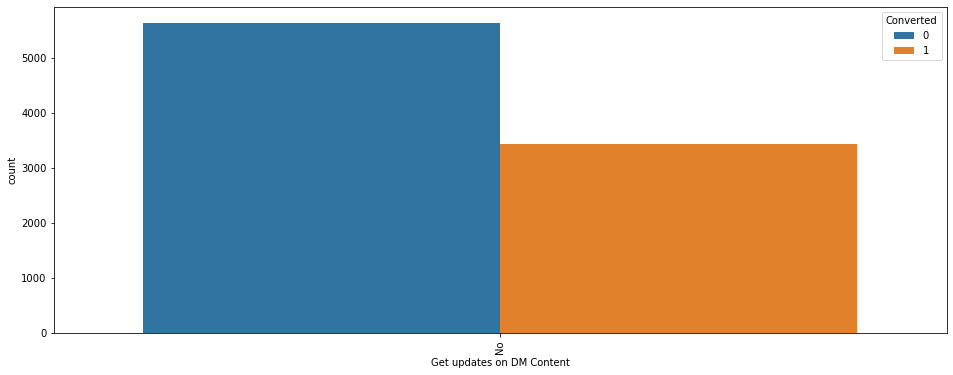

In [77]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Get updates on DM Content', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### City                                             

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

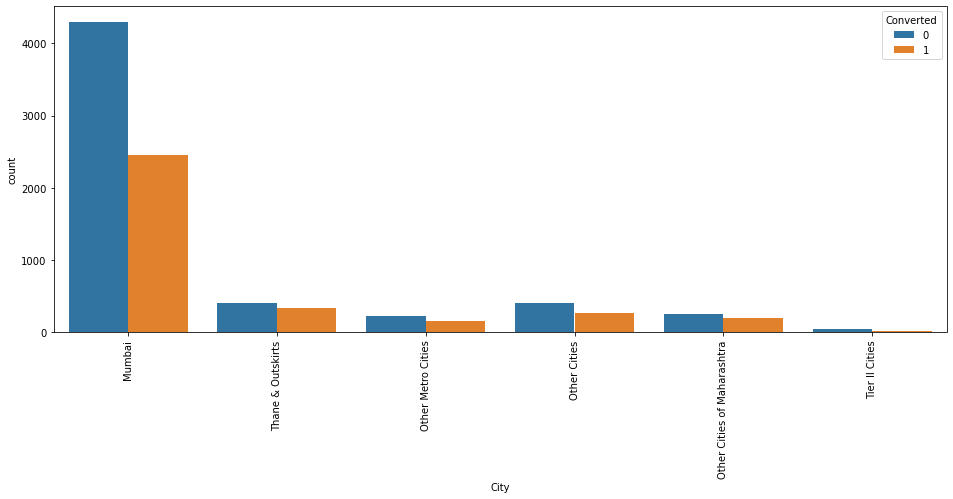

In [78]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'City', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

###  Conclusion

- Most leads are from Mumbai

### I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

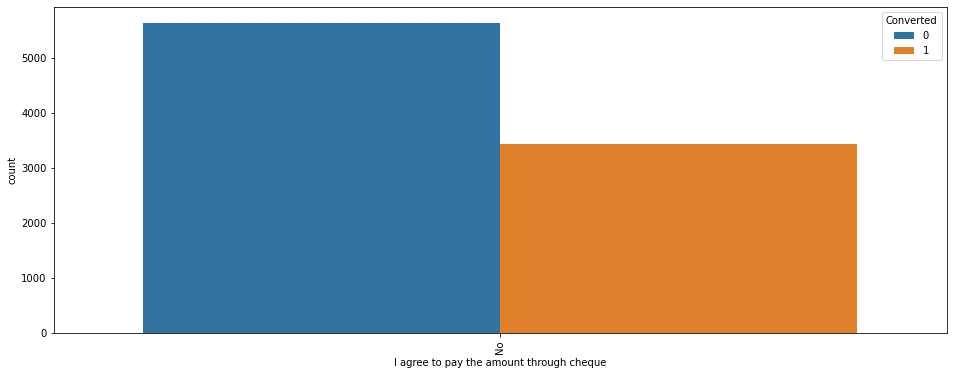

In [79]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'I agree to pay the amount through cheque', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

### A free copy of Mastering The Interview 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

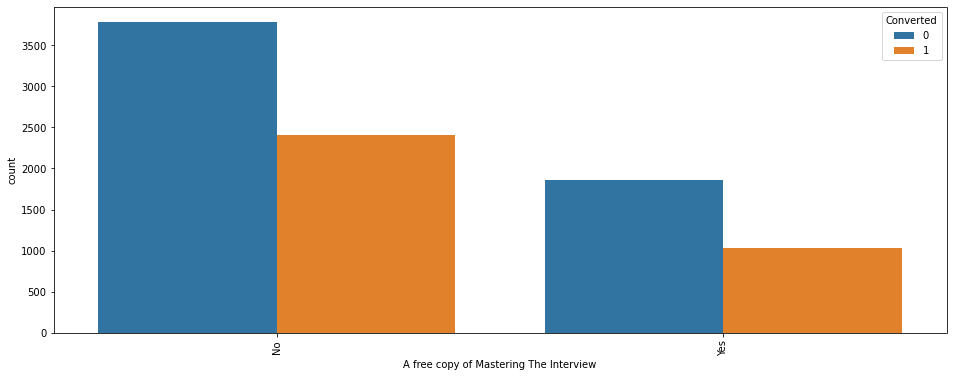

In [80]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

Entries are No only. No conclusion can be drawn with this parameter

###  Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

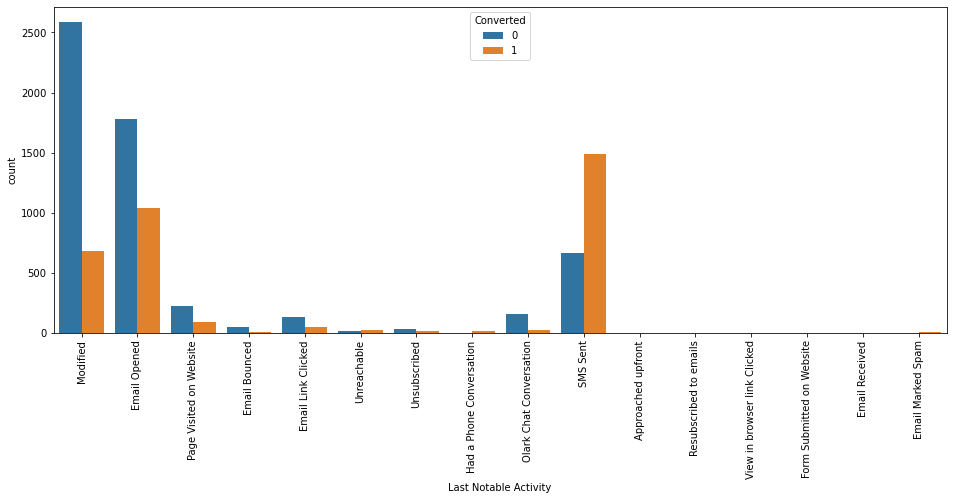

In [81]:
plt.figure(figsize= (16,6))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = df)
plt.xticks(rotation= 90)

### Results

- Most of the Columns in the data atre not adding any values to the model, dropping those values which are not required
- It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [82]:
df =df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
             'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
             'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
             'A free copy of Mastering The Interview'],1)

In [83]:
df.shape

(9074, 14)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

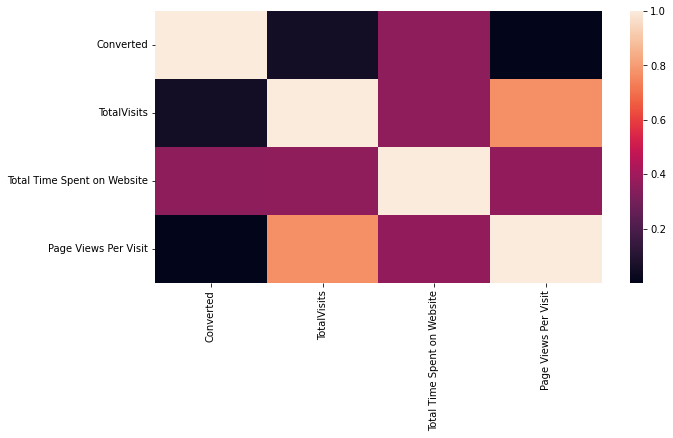

In [85]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [86]:
numeric = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.191867,482.887481,2.265943
std,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,10.000000,1839.000000,6.000000
max,10.000000,2272.000000,6.000000


There aren't any major outliers, so moving on to analysis

### Data preparation 

### 1. creating some Binary variable(Yes/no) to 1/0

In [87]:
vars = ['Do Not Email','Do Not Call']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

df[vars]= df[vars].apply(binary_map)

#### 2. Creating dummy variables for the categorical features:


In [88]:
dummy_data= pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'What is your current occupation','City','Last Notable Activity']], drop_first= True)

dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
# Create df variables using the 'dummy_data' suing concat

df= pd.concat([df, dummy_data],axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'What is your current occupation','City','Last Notable Activity'], axis = 1)
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Test-Train Split


In [91]:
# splitting the data into train and test set.

X= df.drop(['Prospect ID','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [92]:
# Putting the target variable in y

y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state= 100)

### Sclaing the features 

In [94]:
scaler= StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


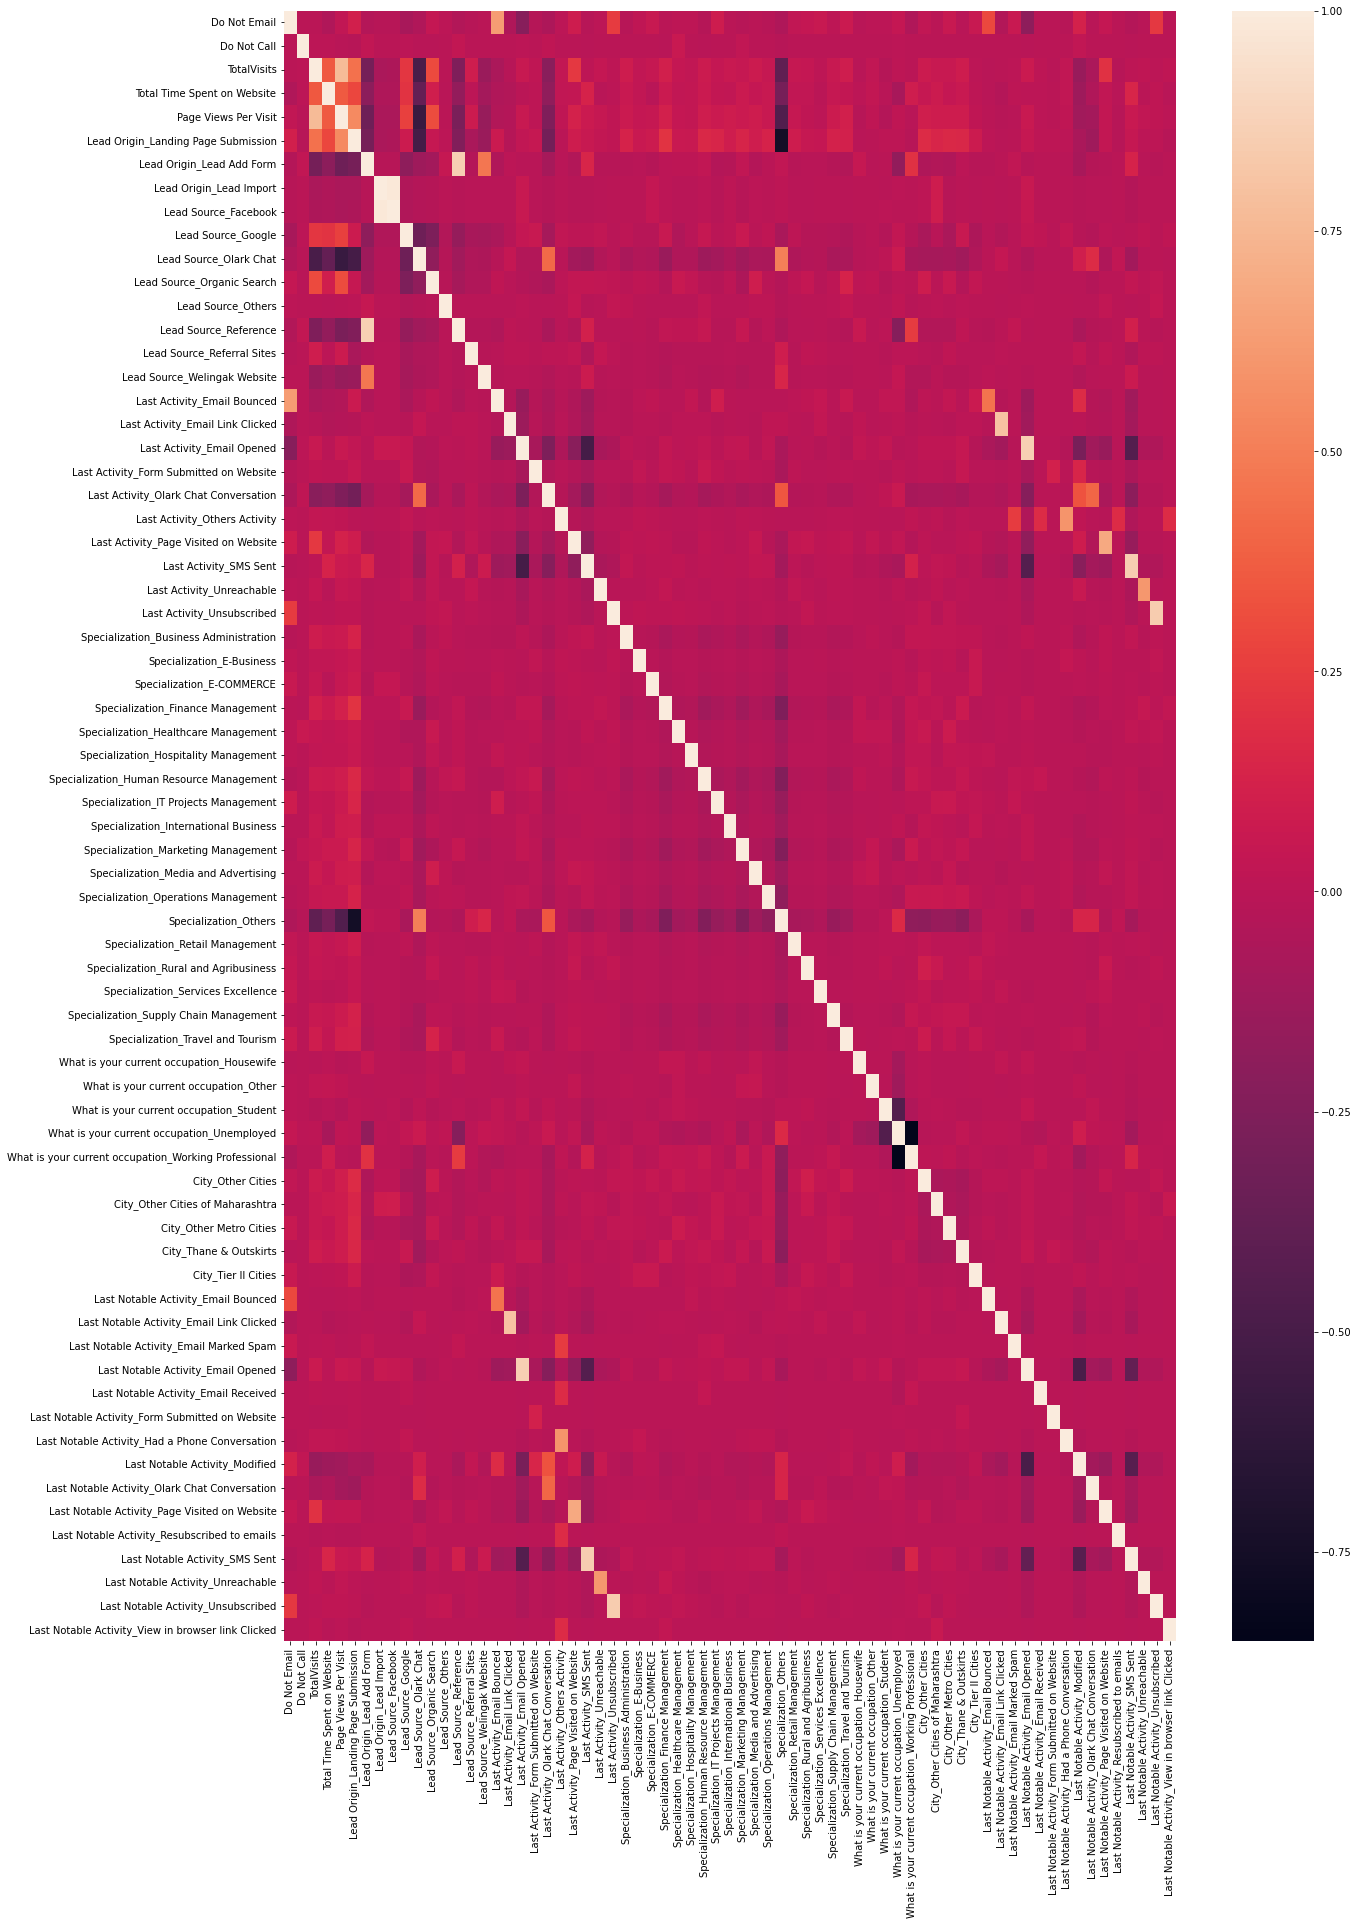

In [95]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [96]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
print(Converted)

print('\n')

print('we have almost 38% lead Converasation rate')

37.85541106458012


we have almost 38% lead Converasation rate


# Model building


##### Feature selection RFE

In [97]:
logreg = LogisticRegression()

In [98]:
rfe= RFE(logreg, step =20)
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [100]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activi

In [101]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Others Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Ac

##### ___All the variables selected by RFE, next statistics part (p-values and the VIFs).___

 

####  Model 1

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm1= sm.GLM(y_train, X_train_sm, family =sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Sun, 19 Mar 2023   Deviance:                       5135.2
Time:                        21:15:10   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
Do Not Email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
Do Not Call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.997      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
Lead Origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
Lead Source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
Last Activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
Last Activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
Last Activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
Last Activity_Others Activity                            2.1619      0.603      3.587      0.000       0.981       3.343
Last Activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
Last Activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
Specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
What is your current occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
What is your current occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
What is your current occupation_Working Professional     1

In [103]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
47,What is your current occupation_Unemployed,836.90
61,Last Notable Activity_Modified,350.08
57,Last Notable Activity_Email Opened,303.65
65,Last Notable Activity_SMS Sent,242.94
6,Lead Origin_Lead Add Form,79.49
48,What is your current occupation_Working Profes...,71.63
13,Lead Source_Reference,61.04
63,Last Notable Activity_Page Visited on Website,35.33
7,Lead Origin_Lead Import,25.39
8,Lead Source_Facebook,25.34


In [104]:
#Since Pvalue of 'Last Notable Activity_View in browser link Clicked' is very high, we can drop this column

In [105]:
col1 = col.drop('Last Notable Activity_View in browser link Clicked')

#### Model 2

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2= sm.GLM(y_train, X_train_sm, family =sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Sun, 19 Mar 2023   Deviance:                       5135.2
Time:                        21:15:12   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
Do Not Email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
Do Not Call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.997      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
Lead Origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
Lead Source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
Last Activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
Last Activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
Last Activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
Last Activity_Others Activity                            2.1619      0.603      3.587      0.000       0.981       3.343
Last Activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
Last Activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
Specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
What is your current occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
What is your current occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
What is your current occupation_Working Professional     1

In [107]:
#Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

col1 = col1.drop('What is your current occupation_Housewife')

#### Model 3

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.0
Date:                Sun, 19 Mar 2023   Deviance:                       5142.0
Time:                        21:15:12   Pearson chi2:                 6.40e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9098      1.331      0.684      0.494      -1.699       3.518
Do Not Email                                            -1.6527      0.210     -7.887      0.000      -2.063      -1.242
Do Not Call                                             19.6217   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
Total Time Spent on Website                              1.1105      0.041     27.031      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.0954      0.130     -8.421      0.000      -1.350      -0.840
Lead Origin_Lead Add Form                                1.5097      0.890      1.697      0.090      -0.234       3.254
Lead Origin_Lead Import                                  0.9200      0.476      1.932      0.053      -0.013       1.854
Lead Source_Olark Chat                                   1.1097      0.125      8.911      0.000       0.866       1.354
Lead Source_Reference                                    1.8347      0.914      2.007      0.045       0.043       3.626
Lead Source_Welingak Website                             4.3946      1.147      3.831      0.000       2.146       6.643
Last Activity_Email Link Clicked                         0.4605      0.396      1.163      0.245      -0.315       1.236
Last Activity_Email Opened                               0.6668      0.185      3.612      0.000       0.305       1.029
Last Activity_Olark Chat Conversation                   -0.6187      0.227     -2.730      0.006      -1.063      -0.174
Last Activity_Others Activity                            2.1025      0.604      3.479      0.001       0.918       3.287
Last Activity_SMS Sent                                   1.1178      0.187      5.988      0.000       0.752       1.484
Last Activity_Unreachable                                0.3010      0.509      0.592      0.554      -0.696       1.298
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.599
Specialization_Hospitality Management                   -0.4287      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1312      0.126     -8.945      0.000      -1.379      -0.883
What is your current occupation_Student                 -1.0898      0.637     -1.710      0.087      -2.339       0.160
What is your current occupation_Unemployed              -1.5354      0.596     -2.577      0.010      -2.703      -0.367
What is your current occupation_Working Professional     1.0954      0.624      1.756      0.079      -0.127       2.318
City_Tier II Cities                                     -0

In [109]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model 4 

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.6
Date:                Sun, 19 Mar 2023   Deviance:                       5143.1
Time:                        21:15:12   Pearson chi2:                 6.40e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8053      1.088      1.659      0.097      -0.327       3.938
Do Not Email                                            -1.6593      0.210     -7.897      0.000      -2.071      -1.247
Do Not Call                                             19.6231   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
Total Time Spent on Website                              1.1098      0.041     27.017      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.0937      0.130     -8.410      0.000      -1.349      -0.839
Lead Origin_Lead Add Form                                1.5100      0.890      1.697      0.090      -0.234       3.254
Lead Origin_Lead Import                                  0.9198      0.476      1.931      0.053      -0.014       1.853
Lead Source_Olark Chat                                   1.1077      0.125      8.895      0.000       0.864       1.352
Lead Source_Reference                                    1.8316      0.914      2.004      0.045       0.040       3.623
Lead Source_Welingak Website                             4.3950      1.147      3.832      0.000       2.147       6.643
Last Activity_Email Link Clicked                         0.4625      0.396      1.169      0.243      -0.313       1.238
Last Activity_Email Opened                               0.6687      0.185      3.623      0.000       0.307       1.030
Last Activity_Olark Chat Conversation                   -0.6159      0.227     -2.718      0.007      -1.060      -0.172
Last Activity_Others Activity                            2.1474      0.597      3.596      0.000       0.977       3.318
Last Activity_SMS Sent                                   1.1197      0.187      5.999      0.000       0.754       1.486
Last Activity_Unreachable                                0.3024      0.509      0.594      0.552      -0.695       1.299
Last Activity_Unsubscribed                               1.3994      1.125      1.244      0.213      -0.805       3.603
Specialization_Hospitality Management                   -0.4285      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1308      0.126     -8.943      0.000      -1.379      -0.883
What is your current occupation_Student                 -1.0906      0.637     -1.711      0.087      -2.340       0.159
What is your current occupation_Unemployed              -1.5364      0.596     -2.578      0.010      -2.704      -0.368
What is your current occupation_Working Professional     1.0936      0.624      1.753      0.080      -0.129       2.316
City_Tier II Cities                                     -0

In [111]:
col1 = col1.drop('Do Not Call')

##### 5 .Model 

In [112]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.2
Date:                Sun, 19 Mar 2023   Deviance:                       5144.5
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8049      1.088      1.658      0.097      -0.328       3.938
Do Not Email                                            -1.6603      0.210     -7.898      0.000      -2.072      -1.248
Total Time Spent on Website                              1.1101      0.041     27.026      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.0981      0.130     -8.450      0.000      -1.353      -0.843
Lead Origin_Lead Add Form                                1.5077      0.889      1.695      0.090      -0.236       3.251
Lead Origin_Lead Import                                  0.9177      0.476      1.926      0.054      -0.016       1.851
Lead Source_Olark Chat                                   1.1064      0.125      8.886      0.000       0.862       1.350
Lead Source_Reference                                    1.8509      0.914      2.026      0.043       0.060       3.642
Lead Source_Welingak Website                             4.3984      1.147      3.835      0.000       2.151       6.646
Last Activity_Email Link Clicked                         0.4617      0.396      1.166      0.244      -0.315       1.238
Last Activity_Email Opened                               0.6714      0.184      3.639      0.000       0.310       1.033
Last Activity_Olark Chat Conversation                   -0.6034      0.226     -2.675      0.007      -1.046      -0.161
Last Activity_Others Activity                            2.1486      0.597      3.597      0.000       0.978       3.319
Last Activity_SMS Sent                                   1.1192      0.187      5.994      0.000       0.753       1.485
Last Activity_Unreachable                                0.3018      0.509      0.593      0.553      -0.696       1.299
Last Activity_Unsubscribed                               1.4002      1.125      1.245      0.213      -0.804       3.605
Specialization_Hospitality Management                   -0.4310      0.329     -1.310      0.190      -1.076       0.214
Specialization_Others                                   -1.1363      0.126     -8.990      0.000      -1.384      -0.889
What is your current occupation_Student                 -1.0887      0.638     -1.707      0.088      -2.339       0.162
What is your current occupation_Unemployed              -1.5335      0.596     -2.571      0.010      -2.702      -0.365
What is your current occupation_Working Professional     1.0952      0.624      1.754      0.079      -0.128       2.319
City_Tier II Cities                                     -0.5666      0.456     -1.243      0.214      -1.460       0.327
Last Notable Activity_Email Bounced                     -0

In [113]:
col1 = col1.drop('What is your current occupation_Student')

##### 6 Model 

In [114]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.8
Date:                Sun, 19 Mar 2023   Deviance:                       5147.5
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8815      0.941      0.937      0.349      -0.962       2.725
Do Not Email                                            -1.6558      0.210     -7.887      0.000      -2.067      -1.244
Total Time Spent on Website                              1.1108      0.041     27.054      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1116      0.130     -8.569      0.000      -1.366      -0.857
Lead Origin_Lead Add Form                                1.5015      0.889      1.688      0.091      -0.242       3.245
Lead Origin_Lead Import                                  0.9108      0.477      1.911      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1014      0.124      8.852      0.000       0.858       1.345
Lead Source_Reference                                    1.8573      0.914      2.033      0.042       0.067       3.648
Lead Source_Welingak Website                             4.4045      1.147      3.841      0.000       2.157       6.652
Last Activity_Email Link Clicked                         0.4487      0.396      1.133      0.257      -0.327       1.225
Last Activity_Email Opened                               0.6636      0.184      3.601      0.000       0.302       1.025
Last Activity_Olark Chat Conversation                   -0.6073      0.225     -2.697      0.007      -1.049      -0.166
Last Activity_Others Activity                            2.1440      0.597      3.589      0.000       0.973       3.315
Last Activity_SMS Sent                                   1.1133      0.187      5.967      0.000       0.748       1.479
Last Activity_Unreachable                                0.2954      0.509      0.580      0.562      -0.702       1.293
Last Activity_Unsubscribed                               1.3914      1.125      1.237      0.216      -0.813       3.596
Specialization_Hospitality Management                   -0.4386      0.329     -1.334      0.182      -1.083       0.206
Specialization_Others                                   -1.1487      0.126     -9.102      0.000      -1.396      -0.901
What is your current occupation_Unemployed              -0.5950      0.214     -2.786      0.005      -1.013      -0.176
What is your current occupation_Working Professional     2.0324      0.284      7.149      0.000       1.475       2.590
City_Tier II Cities                                     -0.5671      0.456     -1.245      0.213      -1.460       0.326
Last Notable Activity_Email Bounced                     -0.1335      1.065     -0.125      0.900      -2.221       1.954
Last Notable Activity_Email Link Clicked                -1

In [115]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#####  7. model


In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.3
Date:                Sun, 19 Mar 2023   Deviance:                       5150.7
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8973      0.941      0.954      0.340      -0.946       2.741
Do Not Email                                            -1.6581      0.210     -7.898      0.000      -2.070      -1.247
Total Time Spent on Website                              1.1088      0.041     27.048      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1304      0.129     -8.737      0.000      -1.384      -0.877
Lead Origin_Lead Import                                  0.8945      0.477      1.876      0.061      -0.040       1.829
Lead Source_Olark Chat                                   1.0948      0.124      8.817      0.000       0.851       1.338
Lead Source_Reference                                    3.3444      0.244     13.723      0.000       2.867       3.822
Lead Source_Welingak Website                             5.8973      0.731      8.068      0.000       4.465       7.330
Last Activity_Email Link Clicked                         0.4443      0.396      1.122      0.262      -0.332       1.220
Last Activity_Email Opened                               0.6646      0.184      3.611      0.000       0.304       1.025
Last Activity_Olark Chat Conversation                   -0.6135      0.225     -2.726      0.006      -1.055      -0.172
Last Activity_Others Activity                            2.1400      0.597      3.585      0.000       0.970       3.310
Last Activity_SMS Sent                                   1.1098      0.186      5.954      0.000       0.744       1.475
Last Activity_Unreachable                                0.2925      0.509      0.575      0.565      -0.705       1.290
Last Activity_Unsubscribed                               1.3895      1.125      1.236      0.217      -0.814       3.594
Specialization_Hospitality Management                   -0.4400      0.329     -1.338      0.181      -1.084       0.204
Specialization_Others                                   -1.1611      0.126     -9.210      0.000      -1.408      -0.914
What is your current occupation_Unemployed              -0.5920      0.214     -2.772      0.006      -1.011      -0.173
What is your current occupation_Working Professional     2.0321      0.284      7.146      0.000       1.475       2.590
City_Tier II Cities                                     -0.5672      0.455     -1.245      0.213      -1.460       0.325
Last Notable Activity_Email Bounced                     -0.1325      1.065     -0.124      0.901      -2.219       1.954
Last Notable Activity_Email Link Clicked                -1.3472      1.010     -1.334      0.182      -3.326       0.632
Last Notable Activity_Email Opened                      -1

In [117]:
col1 = col1.drop('Last Notable Activity_Email Bounced')

#### Model 7

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.3
Date:                Sun, 19 Mar 2023   Deviance:                       5150.7
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8008      0.530      1.510      0.131      -0.239       1.840
Do Not Email                                            -1.6627      0.207     -8.038      0.000      -2.068      -1.257
Total Time Spent on Website                              1.1088      0.041     27.048      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1305      0.129     -8.739      0.000      -1.384      -0.877
Lead Origin_Lead Import                                  0.8943      0.477      1.876      0.061      -0.040       1.829
Lead Source_Olark Chat                                   1.0946      0.124      8.817      0.000       0.851       1.338
Lead Source_Reference                                    3.3447      0.244     13.725      0.000       2.867       3.822
Lead Source_Welingak Website                             5.8969      0.731      8.068      0.000       4.464       7.329
Last Activity_Email Link Clicked                         0.4456      0.396      1.126      0.260      -0.330       1.221
Last Activity_Email Opened                               0.6659      0.184      3.623      0.000       0.306       1.026
Last Activity_Olark Chat Conversation                   -0.6120      0.225     -2.723      0.006      -1.052      -0.172
Last Activity_Others Activity                            2.1780      0.514      4.238      0.000       1.171       3.185
Last Activity_SMS Sent                                   1.1114      0.186      5.974      0.000       0.747       1.476
Last Activity_Unreachable                                0.2939      0.509      0.578      0.564      -0.703       1.291
Last Activity_Unsubscribed                               1.3937      1.124      1.240      0.215      -0.809       3.597
Specialization_Hospitality Management                   -0.4407      0.329     -1.341      0.180      -1.085       0.204
Specialization_Others                                   -1.1616      0.126     -9.220      0.000      -1.409      -0.915
What is your current occupation_Unemployed              -0.5920      0.214     -2.772      0.006      -1.011      -0.173
What is your current occupation_Working Professional     2.0317      0.284      7.145      0.000       1.474       2.589
City_Tier II Cities                                     -0.5668      0.456     -1.244      0.213      -1.460       0.326
Last Notable Activity_Email Link Clicked                -1.2518      0.655     -1.912      0.056      -2.535       0.032
Last Notable Activity_Email Opened                      -1.0310      0.498     -2.069      0.039      -2.008      -0.054
Last Notable Activity_Modified                          -1

In [119]:
col1 = col1.drop('Last Notable Activity_Unsubscribed')

#### Model 8 

In [120]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.4
Date:                Sun, 19 Mar 2023   Deviance:                       5150.8
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7637      0.511      1.496      0.135      -0.237       1.764
Do Not Email                                            -1.6603      0.207     -8.036      0.000      -2.065      -1.255
Total Time Spent on Website                              1.1086      0.041     27.049      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1303      0.129     -8.738      0.000      -1.384      -0.877
Lead Origin_Lead Import                                  0.8942      0.477      1.875      0.061      -0.040       1.829
Lead Source_Olark Chat                                   1.0943      0.124      8.815      0.000       0.851       1.338
Lead Source_Reference                                    3.3445      0.244     13.725      0.000       2.867       3.822
Lead Source_Welingak Website                             5.8978      0.731      8.069      0.000       4.465       7.330
Last Activity_Email Link Clicked                         0.4436      0.396      1.121      0.262      -0.332       1.219
Last Activity_Email Opened                               0.6638      0.184      3.617      0.000       0.304       1.024
Last Activity_Olark Chat Conversation                   -0.6140      0.225     -2.735      0.006      -1.054      -0.174
Last Activity_Others Activity                            2.1908      0.511      4.286      0.000       1.189       3.193
Last Activity_SMS Sent                                   1.1091      0.186      5.972      0.000       0.745       1.473
Last Activity_Unreachable                                0.2916      0.509      0.573      0.566      -0.705       1.289
Last Activity_Unsubscribed                               1.1523      0.585      1.970      0.049       0.006       2.299
Specialization_Hospitality Management                   -0.4406      0.329     -1.340      0.180      -1.085       0.204
Specialization_Others                                   -1.1616      0.126     -9.220      0.000      -1.408      -0.915
What is your current occupation_Unemployed              -0.5919      0.214     -2.772      0.006      -1.011      -0.173
What is your current occupation_Working Professional     2.0314      0.284      7.144      0.000       1.474       2.589
City_Tier II Cities                                     -0.5673      0.455     -1.246      0.213      -1.460       0.325
Last Notable Activity_Email Link Clicked                -1.2126      0.637     -1.904      0.057      -2.461       0.035
Last Notable Activity_Email Opened                      -0.9919      0.474     -2.091      0.037      -1.922      -0.062
Last Notable Activity_Modified                          -1

In [121]:
col1 = col1.drop('Last Notable Activity_SMS Sent')

#### Model 9

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.4
Date:                Sun, 19 Mar 2023   Deviance:                       5150.8
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7864      0.302      2.601      0.009       0.194       1.379
Do Not Email                                            -1.6634      0.199     -8.378      0.000      -2.053      -1.274
Total Time Spent on Website                              1.1086      0.041     27.049      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1301      0.129     -8.738      0.000      -1.384      -0.877
Lead Origin_Lead Import                                  0.8940      0.477      1.875      0.061      -0.041       1.828
Lead Source_Olark Chat                                   1.0943      0.124      8.815      0.000       0.851       1.338
Lead Source_Reference                                    3.3446      0.244     13.725      0.000       2.867       3.822
Lead Source_Welingak Website                             5.8971      0.731      8.069      0.000       4.465       7.329
Last Activity_Email Link Clicked                         0.4446      0.395      1.125      0.260      -0.330       1.219
Last Activity_Email Opened                               0.6649      0.183      3.642      0.000       0.307       1.023
Last Activity_Olark Chat Conversation                   -0.6129      0.224     -2.740      0.006      -1.051      -0.174
Last Activity_Others Activity                            2.1828      0.490      4.452      0.000       1.222       3.144
Last Activity_SMS Sent                                   1.1124      0.176      6.316      0.000       0.767       1.458
Last Activity_Unreachable                                0.2928      0.508      0.576      0.565      -0.703       1.289
Last Activity_Unsubscribed                               1.1359      0.504      2.252      0.024       0.147       2.125
Specialization_Hospitality Management                   -0.4410      0.329     -1.342      0.180      -1.085       0.203
Specialization_Others                                   -1.1615      0.126     -9.220      0.000      -1.408      -0.915
What is your current occupation_Unemployed              -0.5920      0.214     -2.772      0.006      -1.011      -0.173
What is your current occupation_Working Professional     2.0313      0.284      7.144      0.000       1.474       2.589
City_Tier II Cities                                     -0.5668      0.455     -1.245      0.213      -1.459       0.326
Last Notable Activity_Email Link Clicked                -1.2364      0.469     -2.637      0.008      -2.155      -0.317
Last Notable Activity_Email Opened                      -1.0157      0.199     -5.102      0.000      -1.406      -0.626
Last Notable Activity_Modified                          -1

In [123]:
col1 = col1.drop('Last Activity_Unreachable')

#### Model 10

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.5
Date:                Sun, 19 Mar 2023   Deviance:                       5151.1
Time:                        21:15:13   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8008      0.301      2.660      0.008       0.211       1.391
Do Not Email                                            -1.6673      0.198     -8.405      0.000      -2.056      -1.279
Total Time Spent on Website                              1.1081      0.041     27.049      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.731      0.000      -1.382      -0.876
Lead Origin_Lead Import                                  0.8940      0.477      1.875      0.061      -0.040       1.828
Lead Source_Olark Chat                                   1.0944      0.124      8.816      0.000       0.851       1.338
Lead Source_Reference                                    3.3469      0.244     13.735      0.000       2.869       3.824
Lead Source_Welingak Website                             5.8971      0.731      8.069      0.000       4.465       7.329
Last Activity_Email Link Clicked                         0.4272      0.394      1.085      0.278      -0.345       1.199
Last Activity_Email Opened                               0.6476      0.180      3.603      0.000       0.295       1.000
Last Activity_Olark Chat Conversation                   -0.6298      0.221     -2.844      0.004      -1.064      -0.196
Last Activity_Others Activity                            2.1660      0.489      4.427      0.000       1.207       3.125
Last Activity_SMS Sent                                   1.0959      0.173      6.319      0.000       0.756       1.436
Last Activity_Unsubscribed                               1.1233      0.504      2.230      0.026       0.136       2.110
Specialization_Hospitality Management                   -0.4398      0.329     -1.337      0.181      -1.084       0.205
Specialization_Others                                   -1.1615      0.126     -9.221      0.000      -1.408      -0.915
What is your current occupation_Unemployed              -0.5907      0.213     -2.767      0.006      -1.009      -0.172
What is your current occupation_Working Professional     2.0298      0.284      7.142      0.000       1.473       2.587
City_Tier II Cities                                     -0.5695      0.455     -1.251      0.211      -1.461       0.322
Last Notable Activity_Email Link Clicked                -1.2353      0.469     -2.635      0.008      -2.154      -0.316
Last Notable Activity_Email Opened                      -1.0147      0.199     -5.099      0.000      -1.405      -0.625
Last Notable Activity_Modified                          -1.3770      0.141     -9.739      0.000      -1.654      -1.100
Last Notable Activity_Olark Chat Conversation           -1

In [125]:
col1 = col1.drop('City_Tier II Cities')

#### Model 11

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.4
Date:                Sun, 19 Mar 2023   Deviance:                       5152.7
Time:                        21:15:13   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8010      0.301      2.661      0.008       0.211       1.391
Do Not Email                                            -1.6740      0.198     -8.453      0.000      -2.062      -1.286
Total Time Spent on Website                              1.1079      0.041     27.054      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1346      0.129     -8.779      0.000      -1.388      -0.881
Lead Origin_Lead Import                                  0.8932      0.477      1.874      0.061      -0.041       1.828
Lead Source_Olark Chat                                   1.0936      0.124      8.811      0.000       0.850       1.337
Lead Source_Reference                                    3.3466      0.244     13.734      0.000       2.869       3.824
Lead Source_Welingak Website                             5.8981      0.731      8.070      0.000       4.466       7.331
Last Activity_Email Link Clicked                         0.4274      0.393      1.087      0.277      -0.344       1.198
Last Activity_Email Opened                               0.6521      0.180      3.630      0.000       0.300       1.004
Last Activity_Olark Chat Conversation                   -0.6262      0.221     -2.828      0.005      -1.060      -0.192
Last Activity_Others Activity                            2.1725      0.489      4.441      0.000       1.214       3.131
Last Activity_SMS Sent                                   1.0986      0.173      6.335      0.000       0.759       1.438
Last Activity_Unsubscribed                               1.1365      0.503      2.258      0.024       0.150       2.123
Specialization_Hospitality Management                   -0.4443      0.329     -1.349      0.177      -1.090       0.201
Specialization_Others                                   -1.1610      0.126     -9.215      0.000      -1.408      -0.914
What is your current occupation_Unemployed              -0.5941      0.213     -2.783      0.005      -1.012      -0.176
What is your current occupation_Working Professional     2.0228      0.284      7.122      0.000       1.466       2.579
Last Notable Activity_Email Link Clicked                -1.2306      0.468     -2.627      0.009      -2.149      -0.313
Last Notable Activity_Email Opened                      -1.0152      0.199     -5.103      0.000      -1.405      -0.625
Last Notable Activity_Modified                          -1.3769      0.141     -9.739      0.000      -1.654      -1.100
Last Notable Activity_Olark Chat Conversation           -1.1186      0.392     -2.851      0.004      -1.888      -0.350
Last Notable Activity_Page Visited on Website           -0

In [127]:
col1 = col1.drop('Last Activity_Email Link Clicked')

#### Model 12 

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.9
Date:                Sun, 19 Mar 2023   Deviance:                       5153.8
Time:                        21:15:13   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8420      0.298      2.822      0.005       0.257       1.427
Do Not Email                                            -1.6877      0.197     -8.550      0.000      -2.075      -1.301
Total Time Spent on Website                              1.1076      0.041     27.057      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1357      0.129     -8.789      0.000      -1.389      -0.882
Lead Origin_Lead Import                                  0.8931      0.477      1.874      0.061      -0.041       1.827
Lead Source_Olark Chat                                   1.0978      0.124      8.843      0.000       0.854       1.341
Lead Source_Reference                                    3.3564      0.244     13.779      0.000       2.879       3.834
Lead Source_Welingak Website                             5.9100      0.731      8.085      0.000       4.477       7.343
Last Activity_Email Opened                               0.6110      0.175      3.493      0.000       0.268       0.954
Last Activity_Olark Chat Conversation                   -0.6689      0.217     -3.077      0.002      -1.095      -0.243
Last Activity_Others Activity                            2.1333      0.487      4.376      0.000       1.178       3.089
Last Activity_SMS Sent                                   1.0603      0.169      6.273      0.000       0.729       1.392
Last Activity_Unsubscribed                               1.1108      0.502      2.211      0.027       0.126       2.095
Specialization_Hospitality Management                   -0.4376      0.329     -1.331      0.183      -1.082       0.207
Specialization_Others                                   -1.1615      0.126     -9.221      0.000      -1.408      -0.915
What is your current occupation_Unemployed              -0.5964      0.214     -2.793      0.005      -1.015      -0.178
What is your current occupation_Working Professional     2.0162      0.284      7.103      0.000       1.460       2.573
Last Notable Activity_Email Link Clicked                -0.8429      0.307     -2.748      0.006      -1.444      -0.242
Last Notable Activity_Email Opened                      -1.0131      0.199     -5.093      0.000      -1.403      -0.623
Last Notable Activity_Modified                          -1.3750      0.141     -9.731      0.000      -1.652      -1.098
Last Notable Activity_Olark Chat Conversation           -1.1164      0.392     -2.846      0.004      -1.885      -0.348
Last Notable Activity_Page Visited on Website           -0.6661      0.262     -2.545      0.011      -1.179      -0.153
Last Notable Activity_Unreachable                        1

In [129]:
col1 = col1.drop('Specialization_Hospitality Management')

#### Model 13 

In [130]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.8
Date:                Sun, 19 Mar 2023   Deviance:                       5155.6
Time:                        21:15:13   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8330      0.298      2.795      0.005       0.249       1.417
Do Not Email                                            -1.6912      0.197     -8.574      0.000      -2.078      -1.305
Total Time Spent on Website                              1.1057      0.041     27.047      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1347      0.129     -8.782      0.000      -1.388      -0.881
Lead Origin_Lead Import                                  0.8958      0.476      1.880      0.060      -0.038       1.830
Lead Source_Olark Chat                                   1.0951      0.124      8.826      0.000       0.852       1.338
Lead Source_Reference                                    3.3432      0.243     13.746      0.000       2.867       3.820
Lead Source_Welingak Website                             5.9080      0.731      8.082      0.000       4.475       7.341
Last Activity_Email Opened                               0.6115      0.175      3.495      0.000       0.269       0.954
Last Activity_Olark Chat Conversation                   -0.6687      0.217     -3.077      0.002      -1.095      -0.243
Last Activity_Others Activity                            2.1377      0.487      4.388      0.000       1.183       3.093
Last Activity_SMS Sent                                   1.0601      0.169      6.275      0.000       0.729       1.391
Last Activity_Unsubscribed                               1.1110      0.504      2.205      0.027       0.123       2.098
Specialization_Others                                   -1.1529      0.126     -9.167      0.000      -1.399      -0.906
What is your current occupation_Unemployed              -0.5943      0.213     -2.787      0.005      -1.012      -0.176
What is your current occupation_Working Professional     2.0129      0.284      7.095      0.000       1.457       2.569
Last Notable Activity_Email Link Clicked                -0.8395      0.306     -2.740      0.006      -1.440      -0.239
Last Notable Activity_Email Opened                      -1.0141      0.199     -5.099      0.000      -1.404      -0.624
Last Notable Activity_Modified                          -1.3762      0.141     -9.746      0.000      -1.653      -1.099
Last Notable Activity_Olark Chat Conversation           -1.1143      0.392     -2.842      0.004      -1.883      -0.346
Last Notable Activity_Page Visited on Website           -0.6618      0.262     -2.531      0.011      -1.174      -0.149
Last Notable Activity_Unreachable                        1.1860      0.505      2.347      0.019       0.196       2.176
==========================================================

In [131]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,17.52
16,Last Notable Activity_Email Opened,9.53
7,Last Activity_Email Opened,8.37
2,Lead Origin_Landing Page Submission,6.18
10,Last Activity_SMS Sent,4.83
17,Last Notable Activity_Modified,4.80
12,Specialization_Others,4.16
8,Last Activity_Olark Chat Conversation,2.34
14,What is your current occupation_Working Profes...,2.33
4,Lead Source_Olark Chat,2.30


In [132]:
col1 = col1.drop('What is your current occupation_Unemployed')

#### Model 14

In [133]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.6
Date:                Sun, 19 Mar 2023   Deviance:                       5163.2
Time:                        21:15:14   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2592      0.215      1.205      0.228      -0.162       0.681
Do Not Email                                            -1.6855      0.197     -8.535      0.000      -2.073      -1.298
Total Time Spent on Website                              1.1058      0.041     27.059      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1388      0.129     -8.807      0.000      -1.392      -0.885
Lead Origin_Lead Import                                  0.8759      0.476      1.838      0.066      -0.058       1.810
Lead Source_Olark Chat                                   1.1008      0.124      8.872      0.000       0.858       1.344
Lead Source_Reference                                    3.3541      0.243     13.809      0.000       2.878       3.830
Lead Source_Welingak Website                             5.8993      0.731      8.071      0.000       4.467       7.332
Last Activity_Email Opened                               0.6172      0.175      3.526      0.000       0.274       0.960
Last Activity_Olark Chat Conversation                   -0.6574      0.217     -3.027      0.002      -1.083      -0.232
Last Activity_Others Activity                            2.1257      0.487      4.361      0.000       1.170       3.081
Last Activity_SMS Sent                                   1.0521      0.169      6.229      0.000       0.721       1.383
Last Activity_Unsubscribed                               1.0910      0.504      2.165      0.030       0.103       2.079
Specialization_Others                                   -1.1647      0.126     -9.248      0.000      -1.412      -0.918
What is your current occupation_Working Professional     2.5883      0.195     13.266      0.000       2.206       2.971
Last Notable Activity_Email Link Clicked                -0.8358      0.306     -2.733      0.006      -1.435      -0.236
Last Notable Activity_Email Opened                      -1.0105      0.199     -5.085      0.000      -1.400      -0.621
Last Notable Activity_Modified                          -1.3790      0.141     -9.777      0.000      -1.655      -1.103
Last Notable Activity_Olark Chat Conversation           -1.1059      0.391     -2.826      0.005      -1.873      -0.339
Last Notable Activity_Page Visited on Website           -0.6583      0.262     -2.517      0.012      -1.171      -0.146
Last Notable Activity_Unreachable                        1.1782      0.504      2.337      0.019       0.190       2.166
========================================================================================================================
"""

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Email Opened,8.40
7,Last Activity_Email Opened,8.03
2,Lead Origin_Landing Page Submission,5.07
12,Specialization_Others,3.62
16,Last Notable Activity_Modified,3.40
10,Last Activity_SMS Sent,2.94
4,Lead Source_Olark Chat,2.26
8,Last Activity_Olark Chat Conversation,2.26
5,Lead Source_Reference,1.46
17,Last Notable Activity_Olark Chat Conversation,1.41


In [135]:
col1 = col1.drop('Lead Origin_Lead Import')

#### Model 15

In [136]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.1
Date:                Sun, 19 Mar 2023   Deviance:                       5166.3
Time:                        21:15:14   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2873      0.215      1.339      0.181      -0.133       0.708
Do Not Email                                            -1.6840      0.197     -8.530      0.000      -2.071      -1.297
Total Time Spent on Website                              1.0984      0.041     27.061      0.000       1.019       1.178
Lead Origin_Landing Page Submission                     -1.1743      0.128     -9.170      0.000      -1.425      -0.923
Lead Source_Olark Chat                                   1.0748      0.123      8.733      0.000       0.834       1.316
Lead Source_Reference                                    3.3192      0.242     13.710      0.000       2.845       3.794
Lead Source_Welingak Website                             5.8742      0.731      8.039      0.000       4.442       7.306
Last Activity_Email Opened                               0.6236      0.175      3.564      0.000       0.281       0.966
Last Activity_Olark Chat Conversation                   -0.6585      0.217     -3.032      0.002      -1.084      -0.233
Last Activity_Others Activity                            2.1249      0.487      4.364      0.000       1.170       3.079
Last Activity_SMS Sent                                   1.0598      0.169      6.280      0.000       0.729       1.391
Last Activity_Unsubscribed                               1.0952      0.503      2.176      0.030       0.109       2.082
Specialization_Others                                   -1.1865      0.126     -9.434      0.000      -1.433      -0.940
What is your current occupation_Working Professional     2.5887      0.195     13.273      0.000       2.206       2.971
Last Notable Activity_Email Link Clicked                -0.8276      0.306     -2.707      0.007      -1.427      -0.228
Last Notable Activity_Email Opened                      -1.0027      0.199     -5.048      0.000      -1.392      -0.613
Last Notable Activity_Modified                          -1.3719      0.141     -9.734      0.000      -1.648      -1.096
Last Notable Activity_Olark Chat Conversation           -1.0932      0.391     -2.796      0.005      -1.860      -0.327
Last Notable Activity_Page Visited on Website           -0.6518      0.261     -2.494      0.013      -1.164      -0.140
Last Notable Activity_Unreachable                        1.1799      0.504      2.341      0.019       0.192       2.168
========================================================================================================================
"""

In [137]:
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model 16 

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Sun, 19 Mar 2023   Deviance:                       5170.7
Time:                        21:15:14   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3753      0.210      1.786      0.074      -0.037       0.787
Do Not Email                                            -1.5740      0.186     -8.444      0.000      -1.939      -1.209
Total Time Spent on Website                              1.0993      0.041     27.094      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1778      0.128     -9.198      0.000      -1.429      -0.927
Lead Source_Olark Chat                                   1.0764      0.123      8.747      0.000       0.835       1.318
Lead Source_Reference                                    3.3148      0.242     13.701      0.000       2.841       3.789
Lead Source_Welingak Website                             5.8544      0.730      8.021      0.000       4.424       7.285
Last Activity_Email Opened                               0.5904      0.174      3.403      0.001       0.250       0.930
Last Activity_Olark Chat Conversation                   -0.6937      0.216     -3.212      0.001      -1.117      -0.270
Last Activity_Others Activity                            2.0671      0.487      4.244      0.000       1.112       3.022
Last Activity_SMS Sent                                   0.9784      0.164      5.978      0.000       0.658       1.299
Specialization_Others                                   -1.1874      0.126     -9.447      0.000      -1.434      -0.941
What is your current occupation_Working Professional     2.5867      0.194     13.301      0.000       2.206       2.968
Last Notable Activity_Email Link Clicked                -0.9137      0.303     -3.019      0.003      -1.507      -0.321
Last Notable Activity_Email Opened                      -1.0555      0.197     -5.349      0.000      -1.442      -0.669
Last Notable Activity_Modified                          -1.4249      0.139    -10.243      0.000      -1.698      -1.152
Last Notable Activity_Olark Chat Conversation           -1.1481      0.390     -2.942      0.003      -1.913      -0.383
Last Notable Activity_Page Visited on Website           -0.7440      0.257     -2.894      0.004      -1.248      -0.240
Last Notable Activity_Unreachable                        1.0922      0.502      2.177      0.029       0.109       2.075
========================================================================================================================
"""

In [139]:
col1 = col1.drop('Last Notable Activity_Email Link Clicked')

### Model 17 

In [140]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.1
Date:                Sun, 19 Mar 2023   Deviance:                       5180.2
Time:                        21:15:14   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0512      0.182      0.282      0.778      -0.305       0.407
Do Not Email                                            -1.4734      0.183     -8.044      0.000      -1.832      -1.114
Total Time Spent on Website                              1.1003      0.041     27.128      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1783      0.128     -9.196      0.000      -1.429      -0.927
Lead Source_Olark Chat                                   1.0568      0.123      8.624      0.000       0.817       1.297
Lead Source_Reference                                    3.2836      0.241     13.629      0.000       2.811       3.756
Lead Source_Welingak Website                             5.8181      0.729      7.982      0.000       4.389       7.247
Last Activity_Email Opened                               0.7304      0.169      4.314      0.000       0.399       1.062
Last Activity_Olark Chat Conversation                   -0.5469      0.212     -2.579      0.010      -0.963      -0.131
Last Activity_Others Activity                            2.2749      0.479      4.753      0.000       1.337       3.213
Last Activity_SMS Sent                                   1.2622      0.136      9.312      0.000       0.997       1.528
Specialization_Others                                   -1.1878      0.126     -9.451      0.000      -1.434      -0.941
What is your current occupation_Working Professional     2.5945      0.195     13.316      0.000       2.213       2.976
Last Notable Activity_Email Opened                      -0.8669      0.186     -4.649      0.000      -1.232      -0.501
Last Notable Activity_Modified                          -1.2353      0.123    -10.051      0.000      -1.476      -0.994
Last Notable Activity_Olark Chat Conversation           -0.9602      0.385     -2.495      0.013      -1.715      -0.206
Last Notable Activity_Page Visited on Website           -0.4241      0.235     -1.805      0.071      -0.885       0.036
Last Notable Activity_Unreachable                        1.4169      0.490      2.891      0.004       0.456       2.377
========================================================================================================================
"""

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,8.23
6,Last Activity_Email Opened,7.97
2,Lead Origin_Landing Page Submission,4.40
10,Specialization_Others,3.35
13,Last Notable Activity_Modified,3.20
9,Last Activity_SMS Sent,2.66
7,Last Activity_Olark Chat Conversation,2.24
3,Lead Source_Olark Chat,2.18
4,Lead Source_Reference,1.41
14,Last Notable Activity_Olark Chat Conversation,1.40


In [142]:
col1 = col1.drop('Last Notable Activity_Email Opened')

### Model 18

In [143]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Sun, 19 Mar 2023   Deviance:                       5201.4
Time:                        21:15:14   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2218      0.172     -1.287      0.198      -0.560       0.116
Do Not Email                                            -1.4415      0.182     -7.926      0.000      -1.798      -1.085
Total Time Spent on Website                              1.1041      0.040     27.277      0.000       1.025       1.183
Lead Origin_Landing Page Submission                     -1.1801      0.128     -9.224      0.000      -1.431      -0.929
Lead Source_Olark Chat                                   1.0865      0.122      8.873      0.000       0.847       1.327
Lead Source_Reference                                    3.3115      0.241     13.724      0.000       2.839       3.784
Lead Source_Welingak Website                             5.8244      0.729      7.989      0.000       4.395       7.253
Last Activity_Email Opened                               0.2111      0.131      1.616      0.106      -0.045       0.467
Last Activity_Olark Chat Conversation                   -0.6509      0.210     -3.094      0.002      -1.063      -0.239
Last Activity_Others Activity                            2.3289      0.472      4.939      0.000       1.405       3.253
Last Activity_SMS Sent                                   1.4542      0.129     11.264      0.000       1.201       1.707
Specialization_Others                                   -1.1897      0.126     -9.468      0.000      -1.436      -0.943
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8749      0.094     -9.282      0.000      -1.060      -0.690
Last Notable Activity_Olark Chat Conversation           -0.6018      0.377     -1.597      0.110      -1.340       0.137
Last Notable Activity_Page Visited on Website           -0.1568      0.228     -0.687      0.492      -0.604       0.291
Last Notable Activity_Unreachable                        1.6878      0.487      3.466      0.001       0.733       2.642
========================================================================================================================
"""

In [144]:
col1 = col1.drop('Last Activity_Email Opened')

#### Model 19

In [145]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.0
Date:                Sun, 19 Mar 2023   Deviance:                       5204.1
Time:                        21:15:14   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4017
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0330      0.127     -0.261      0.794      -0.281       0.215
Do Not Email                                            -1.5019      0.177     -8.462      0.000      -1.850      -1.154
Total Time Spent on Website                              1.1034      0.040     27.291      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1847      0.128     -9.274      0.000      -1.435      -0.934
Lead Source_Olark Chat                                   1.0885      0.123      8.885      0.000       0.848       1.329
Lead Source_Reference                                    3.3256      0.242     13.767      0.000       2.852       3.799
Lead Source_Welingak Website                             5.8421      0.729      8.015      0.000       4.414       7.271
Last Activity_Olark Chat Conversation                   -0.7707      0.196     -3.926      0.000      -1.155      -0.386
Last Activity_Others Activity                            2.1852      0.464      4.708      0.000       1.276       3.095
Last Activity_SMS Sent                                   1.2865      0.076     16.916      0.000       1.137       1.436
Specialization_Others                                   -1.1925      0.126     -9.499      0.000      -1.439      -0.946
What is your current occupation_Working Professional     2.6044      0.194     13.397      0.000       2.223       2.985
Last Notable Activity_Modified                          -0.9425      0.085    -11.120      0.000      -1.109      -0.776
Last Notable Activity_Olark Chat Conversation           -0.6678      0.375     -1.782      0.075      -1.402       0.067
Last Notable Activity_Page Visited on Website           -0.3379      0.199     -1.700      0.089      -0.728       0.052
Last Notable Activity_Unreachable                        1.5036      0.474      3.175      0.001       0.575       2.432
========================================================================================================================
"""

In [146]:
col1 = col1.drop('Last Notable Activity_Olark Chat Conversation')

#### Model 21

In [147]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.7
Date:                Sun, 19 Mar 2023   Deviance:                       5207.4
Time:                        21:15:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4014
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0367      0.127     -0.290      0.772      -0.285       0.211
Do Not Email                                            -1.5082      0.177     -8.517      0.000      -1.855      -1.161
Total Time Spent on Website                              1.0996      0.040     27.262      0.000       1.021       1.179
Lead Origin_Landing Page Submission                     -1.1901      0.128     -9.316      0.000      -1.440      -0.940
Lead Source_Olark Chat                                   1.0855      0.123      8.858      0.000       0.845       1.326
Lead Source_Reference                                    3.3175      0.241     13.740      0.000       2.844       3.791
Lead Source_Welingak Website                             5.8172      0.728      7.990      0.000       4.390       7.244
Last Activity_Olark Chat Conversation                   -0.9639      0.171     -5.620      0.000      -1.300      -0.628
Last Activity_Others Activity                            2.1728      0.463      4.691      0.000       1.265       3.081
Last Activity_SMS Sent                                   1.2890      0.076     16.971      0.000       1.140       1.438
Specialization_Others                                   -1.1983      0.126     -9.538      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6056      0.194     13.414      0.000       2.225       2.986
Last Notable Activity_Modified                          -0.9054      0.082    -11.059      0.000      -1.066      -0.745
Last Notable Activity_Page Visited on Website           -0.3269      0.199     -1.646      0.100      -0.716       0.062
Last Notable Activity_Unreachable                        1.5121      0.473      3.194      0.001       0.584       2.440
========================================================================================================================
"""

In [148]:
col1 = col1.drop('Last Notable Activity_Page Visited on Website')

#### Model 21

In [149]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Sun, 19 Mar 2023   Deviance:                       5210.2
Time:                        21:15:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Others Activity                            2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [151]:
col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model 22

In [152]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Sun, 19 Mar 2023   Deviance:                       5221.0
Time:                        21:15:14   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Others Activity                            2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


###### All the VIF values are good and all the p-values are below 0.05. So we can fix model. 

### Creating Prediction

In [154]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [155]:
#Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

In [156]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


In [157]:
## Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


## Model Evaluation

In [158]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [159]:
# Predicted     not_churn    churn
# Actual
# not_churn        3461       444
# churn             719      1727

In [160]:
# Let's check the overall accuracy.

print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


Accuracy: 0.8168792316170682


___That's around 81% accuracy with is a very good value___

In [161]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [162]:
# Calculating the sensitivity
TP/(TP+FN)

0.7060506950122649

In [163]:
# Calculating the specificity
TN/(TN+FP)

0.8862996158770806

_With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 88%.___

##  Optimise Cut off (ROC Curve)

In [164]:
#The previous cut off was randomely selected. Now to find the optimum one

def draw_roc(actual, probs):
    fpr,tpr, thresholds =metrics.roc_curve(actual, probs, drop_intermediate= False)
    auc_score =metrics.roc_auc_score(actual, probs)
    plt.plot(fpr,tpr, label ='ROC Curve(area =%0.2f)'% auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [165]:
fpr, tbr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob, drop_intermediate= False)

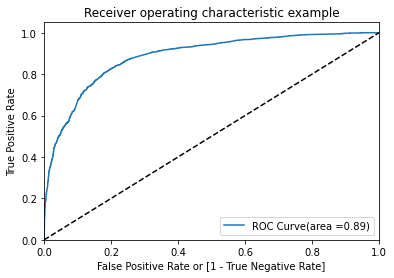

In [166]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

__The area under ROC curve is 0.89 which is a very good value__

In [167]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion_prob.map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [168]:
#creating dataframe to see the values of accuracy, sensitivity and specificity at different values of probability cutoffs

cutoff_df =pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

#making confusion matrix to find values of sensitivity, accurace and specificity for each level of probability
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 =sum(sum(cm1))
    accuracy =(cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i]= [i, accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.586049,0.973426,0.343406
0.2,0.2,0.748386,0.916599,0.643022
0.3,0.3,0.801449,0.849959,0.771063
0.4,0.4,0.816564,0.772690,0.844046
0.5,0.5,0.816879,0.706051,0.886300
0.6,0.6,0.797040,0.600572,0.920102
0.7,0.7,0.786963,0.531889,0.946735
0.8,0.8,0.761297,0.424775,0.972087
0.9,0.9,0.720831,0.294767,0.987708


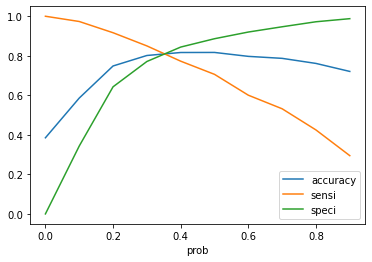

In [169]:
#plotting it

cutoff_df.plot.line(x='prob', y =['accuracy','sensi','speci'])
plt.show()

__From the graph it is visible that the optimal cut off is at 0.34.__

In [170]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map(lambda x:1 if x> 0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [171]:
#check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8108959219020627

In [172]:
#creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [173]:
#substituting  the value of true Positive
TP = confusion2[1,1]
#substituting  the value of true negative
TN = confusion2[0,0]
#substituting  the value of false Positive
FP = confusion2[0,1]
#substituting  the value of false negative
FN =  confusion2[1,0]

In [174]:
#calculating the sensitivity

TP/(TP+FN)

0.8172526573998364

In [175]:
#calculating the specificity

TN/(TN+FP)

0.8069142125480153

___With the current cut off as 0.34 we have accuracy, sensitivity is 81% and specificity of around 80%.___

### Prediction on Test set
 

In [176]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [177]:
# Substituting all the columns in the final train model


In [178]:
# Select the columns in X_train for X_test as well
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [179]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [183]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#putting prospect id to index
y_test_df['Prospect ID'] = y_test_df.index
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [185]:
# Making prediction using cut off 0.34
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x:1 if x >0.34 else 0)
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob,final_predicted
0,0,3271,0.130342,0
1,1,1490,0.969057,1
2,0,7936,0.112570,0
3,1,4216,0.802999,1
4,0,3830,0.132924,0


In [186]:
#checking overasll accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8049944913698127

In [187]:
#creating confussion metrics

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final.final_predicted)
confusion2

array([[1396,  338],
       [ 193,  796]], dtype=int64)

In [188]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [190]:
#calculating the sensitivity
TP/(TP+FN)

0.8048533872598584

In [192]:
#calculating the specificity

TN/(TN+FP)

0.8050749711649365

___With the current cut off as 0.34 we have accuracy, sensitivity and specificity of around 80%.___

## Result:


__Train Data__

1. __Accuarcy__: 81.0%
2. __Sensitivity__: 81.7%
3. __Specficity__: 80.6%


__Test Data__

1. __Accuarcy__: 80.4%
2. __Sensitivity__: 80.4%
3. __Specficity__: 80.5%

### Precision Recall

In [193]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [195]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7954859511745739

In [196]:
#recall = TP/TP+FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7060506950122649

### Precision and recall tradeoff

In [199]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [200]:
p, r, thresholds= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

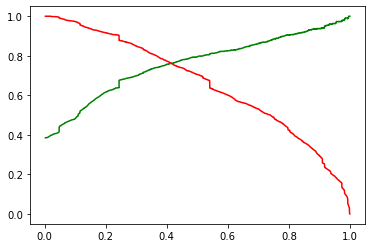

In [203]:
plt.plot(thresholds, p[:-1], 'g')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

In [206]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map(lambda x:1 if x >0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [207]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8108959219020627

In [208]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [209]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [210]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7261169633127498

In [211]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8172526573998364

___With the current cut off as 0.34 we have Precision around 72% and Recall around 81%___

In [212]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.130342
1,1,0.969057
2,0,0.112570
3,1,0.802999
4,0,0.132924


In [214]:
# Making prediction using cut off 0.34
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.130342,0
1,1,0.969057,1
2,0,0.112570,0
3,1,0.802999,1
4,0,0.132924,0
...,...,...,...
2718,0,0.191657,0
2719,0,0.127680,0
2720,1,0.854745,1
2721,0,0.112011,0


In [215]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8049944913698127

In [216]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 193,  796]], dtype=int64)

In [217]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [218]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7019400352733686

In [219]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8048533872598584

___With the current cut off as 0.34 we have Precision around 70% and Recall around 80%___

### Assigning Lead score to the training data


In [226]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


In [227]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))


Accuracy : 0.8108959219020627


In [228]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [229]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [236]:
# Precision = TP / TP + FP
TP/(TP+FN)

0.8172526573998364

In [237]:
#Specificity= TN/TN+FP
TN/(TN+FP)

0.8069142125480153

In [238]:
#False Positive rate = FP/TN+FP
FP/(TN+FP)

0.19308578745198463

In [240]:
#Positive Predictive Value =TP/TP+FP
TP/(TP+FP)

0.7261169633127498

In [242]:
#Negative Predictive Value= TN/TN+ FN
TN/(TN+ FN)

0.8757643135075042

In [244]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,0,0.130342,0,13
1,1,0.969057,1,97
2,0,0.112570,0,11
3,1,0.802999,1,80
4,0,0.132924,0,13


In [248]:
#Highly efficient leads which needs to be contacted

hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
1,1,0.969057,1,97
8,1,0.916621,1,92
16,1,0.924467,1,92
21,1,0.992551,1,99
23,1,0.997991,1,100


In [249]:
hot_leads.sum()

Converted            333.000000
Conversion_Prob      345.509059
final_predicted      368.000000
Lead_Score         34557.000000
dtype: float64

__So there are total 368 leads which needs to be contacted__

#### important feature of our final model

In [251]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Others Activity                           2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Others                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64

# Conclusion:

__it was found that the variables that mattered  the most is the potential buyers are:
1. the total time spend on website
2. total number of visists.
3. the working professionals as current occupations
4. the last Activity of SMS sent, olark chat conversastion

